# AIOps Demonstration Notebook


# AIOps Demonstration Notebook

## Introduction

This notebook demonstrates an AIOps (Artificial Intelligence for IT Operations) workflow, including data loading, preprocessing, analysis, and insights extraction. The goal is to provide a clear and structured approach to analyzing server and business metrics, identify patterns, and draw actionable insights.

### Objectives

- Load and explore server and business metrics data
- Preprocess the data to handle missing values
- Perform clustering analysis on server metrics
- Visualize the results to gain insights

## Setup Environment
To get started, we need to install the necessary Python libraries. Run the following command to install the required packages.

In [12]:
# Setup Environment
%pip install numpy pandas matplotlib seaborn scikit-learn statsmodels


[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Step 1: Load and Explore Data
import pandas as pd
import numpy as np
import logging

# Load datasets
server_metrics = pd.read_csv("server_metrics.csv")
business_metrics = pd.read_csv("business_metrics.csv")

# Display basic information and statistics
print("Server Metrics Info:")
print(server_metrics.info())
print(server_metrics.describe())

print("Business Metrics Info:")
print(business_metrics.info())
print(business_metrics.describe())

Server Metrics Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      3000 non-null   object 
 1   CPU Utilization (%)            3000 non-null   float64
 2   Memory Utilization (%)         3000 non-null   float64
 3   Network I/O Throughput (Mbps)  3000 non-null   float64
 4   Disk I/O Throughput (MB/s)     3000 non-null   float64
 5   Server Configuration           3000 non-null   object 
dtypes: float64(4), object(2)
memory usage: 140.8+ KB
None
       CPU Utilization (%)  Memory Utilization (%)  \
count          3000.000000             3000.000000   
mean             27.438206               41.001839   
std              33.387453               15.813472   
min               0.001396               10.063554   
25%               2.216836               28.265768   
50%       

In [14]:
# Step 2: Data Preprocessing

def fill_missing_values(df):
    """
    Fill missing values in numeric columns with the mean of the respective columns.
    
    Parameters:
    df (DataFrame): The dataframe to preprocess.
    
    Returns:
    DataFrame: The dataframe with missing values filled.
    """
    numeric_df = df.select_dtypes(include="number").fillna(df.select_dtypes(include="number").mean())
    non_numeric_df = df.select_dtypes(exclude="number")
    return pd.concat([non_numeric_df, numeric_df], axis=1)

# Preprocess server metrics
server_metrics = fill_missing_values(server_metrics)

# Preprocess business metrics
business_metrics = fill_missing_values(business_metrics)

# Print columns to ensure 'Timestamp' is preserved
print("Server Metrics Columns After Preprocessing:")
print(server_metrics.columns)

print("Business Metrics Columns After Preprocessing:")
print(business_metrics.columns)

print("Data Preprocessing Completed.")

Server Metrics Columns After Preprocessing:
Index(['Timestamp', 'Server Configuration', 'CPU Utilization (%)',
       'Memory Utilization (%)', 'Network I/O Throughput (Mbps)',
       'Disk I/O Throughput (MB/s)'],
      dtype='object')
Business Metrics Columns After Preprocessing:
Index(['Timestamp', 'Server Configuration', 'Response Time (ms)',
       'Customer Satisfaction (CSAT)', 'Operational Costs ($)',
       'Service Uptime (%)'],
      dtype='object')
Data Preprocessing Completed.


Silhouette Score: 0.40290237786432576


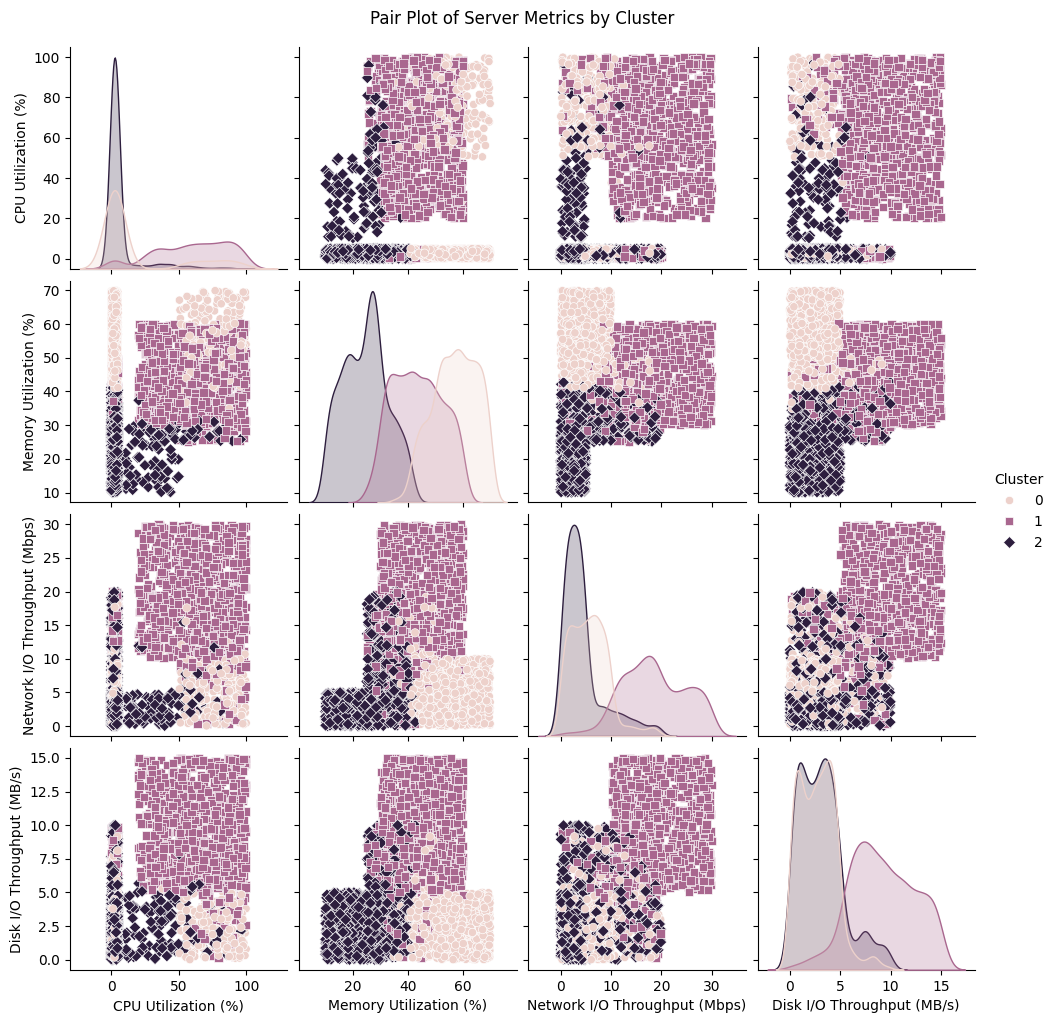

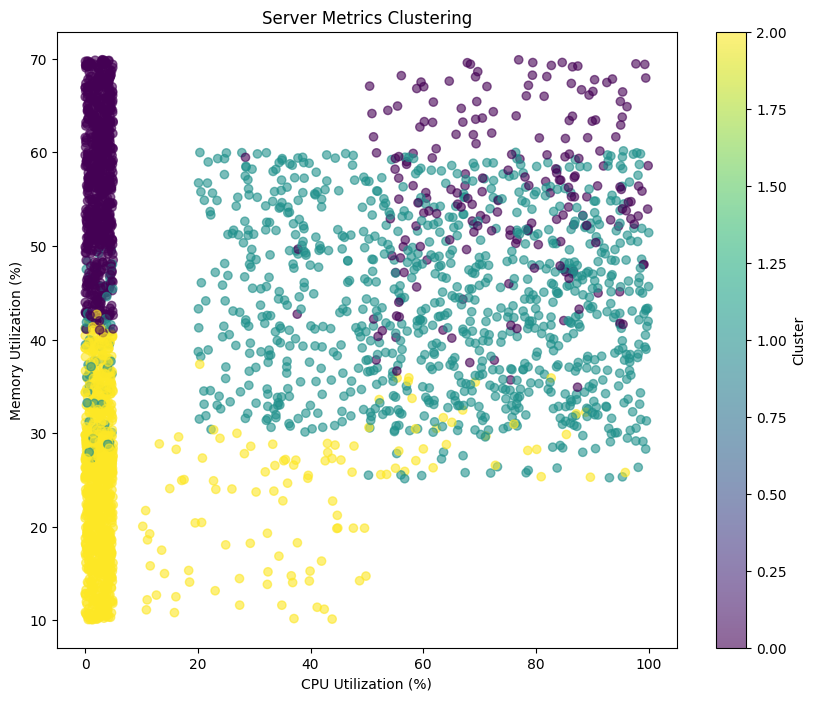

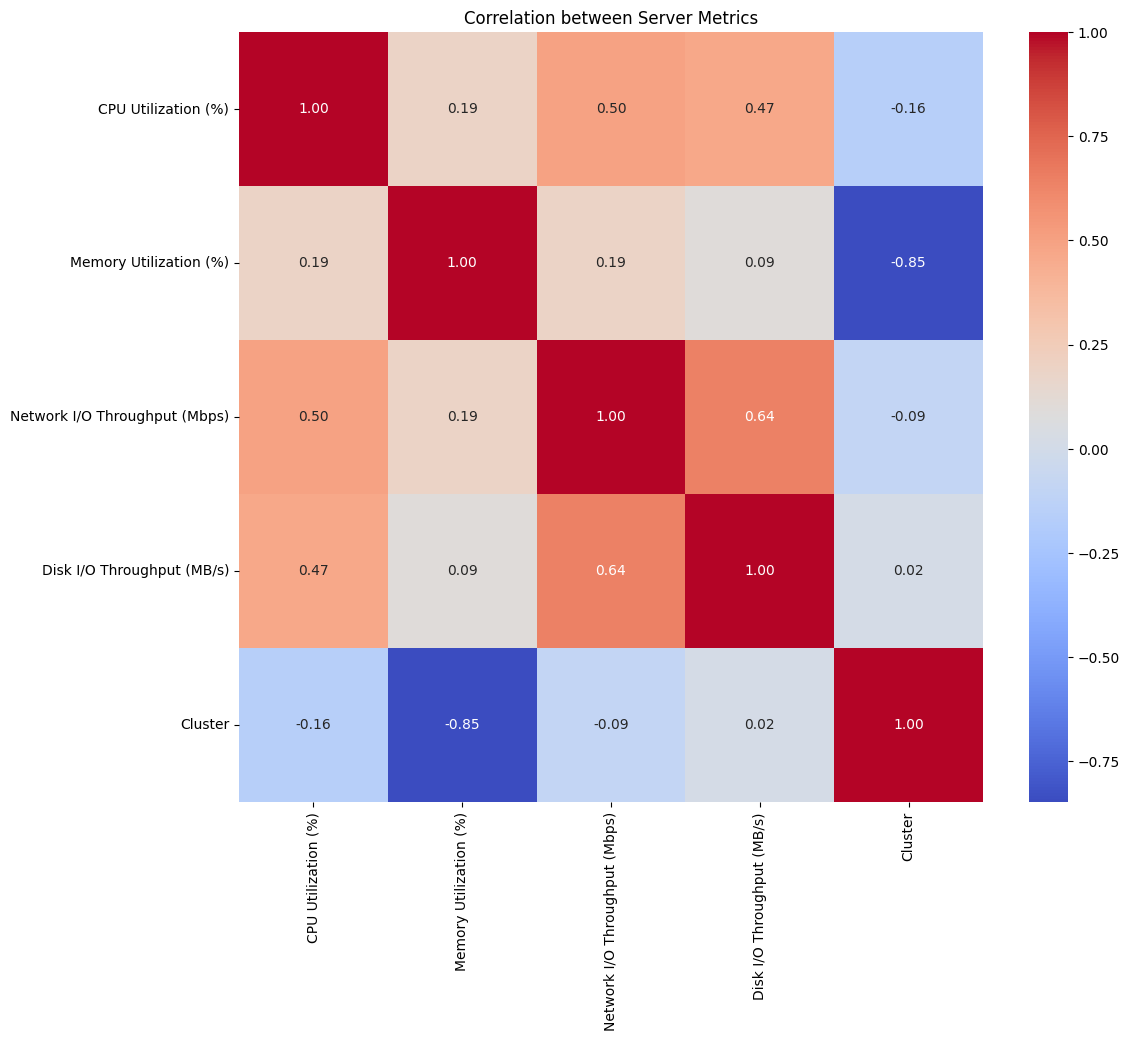

Silhouette Score: 0.5200705849093704


In [15]:
# Step 3: Data Analysis and Insights

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def perform_clustering(df, n_clusters=3):
    """
    Perform KMeans clustering on the given dataframe.

    Parameters:
    df (DataFrame): The dataframe to cluster.
    n_clusters (int): The number of clusters.

    Returns:
    DataFrame: The dataframe with cluster labels added.
    float: The silhouette score for the clustering.
    """
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df.select_dtypes(include="number"))

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)

    df["Cluster"] = clusters
    silhouette_avg = silhouette_score(df_scaled, clusters)

    return df, silhouette_avg


def visualize_correlations(df):
    """
    Visualize the correlations between numeric features in the dataframe.

    Parameters:
    df (DataFrame): The dataframe to visualize.
    """
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation between Server Metrics")
    plt.show()


def visualize_clusters(df, x_col, y_col):
    """
    Visualize the clusters using scatter plots.

    Parameters:
    df (DataFrame): The dataframe with cluster labels.
    x_col (str): The column name for the x-axis.
    y_col (str): The column name for the y-axis.
    """
    plt.figure(figsize=(10, 8))
    plt.scatter(df[x_col], df[y_col], c=df["Cluster"], cmap="viridis", alpha=0.6)
    plt.colorbar(label="Cluster")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title("Server Metrics Clustering")
    plt.show()


def visualize_pairplot(df):
    """
    Create a pair plot to visualize clusters across multiple features.

    Parameters:
    df (DataFrame): The dataframe with cluster labels.
    """
    sns.pairplot(df, hue="Cluster", diag_kind="kde", markers=["o", "s", "D"])
    plt.suptitle("Pair Plot of Server Metrics by Cluster", y=1.02)
    plt.show()


# Perform clustering on server metrics
server_metrics, silhouette_avg = perform_clustering(server_metrics)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the results
visualize_pairplot(server_metrics)
visualize_clusters(server_metrics, "CPU Utilization (%)", "Memory Utilization (%)")
visualize_correlations(server_metrics.select_dtypes(include="number"))
# Normalize/Scale Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
server_metrics_scaled = scaler.fit_transform(
    server_metrics.select_dtypes(include="number")
)

# Example: KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
server_clusters = kmeans.fit_predict(server_metrics_scaled)

# Add cluster labels to the original dataframe
server_metrics["Cluster"] = server_clusters

# Calculate silhouette score for evaluating the clustering
silhouette_avg = silhouette_score(server_metrics_scaled, server_clusters)
print(f"Silhouette Score: {silhouette_avg}")

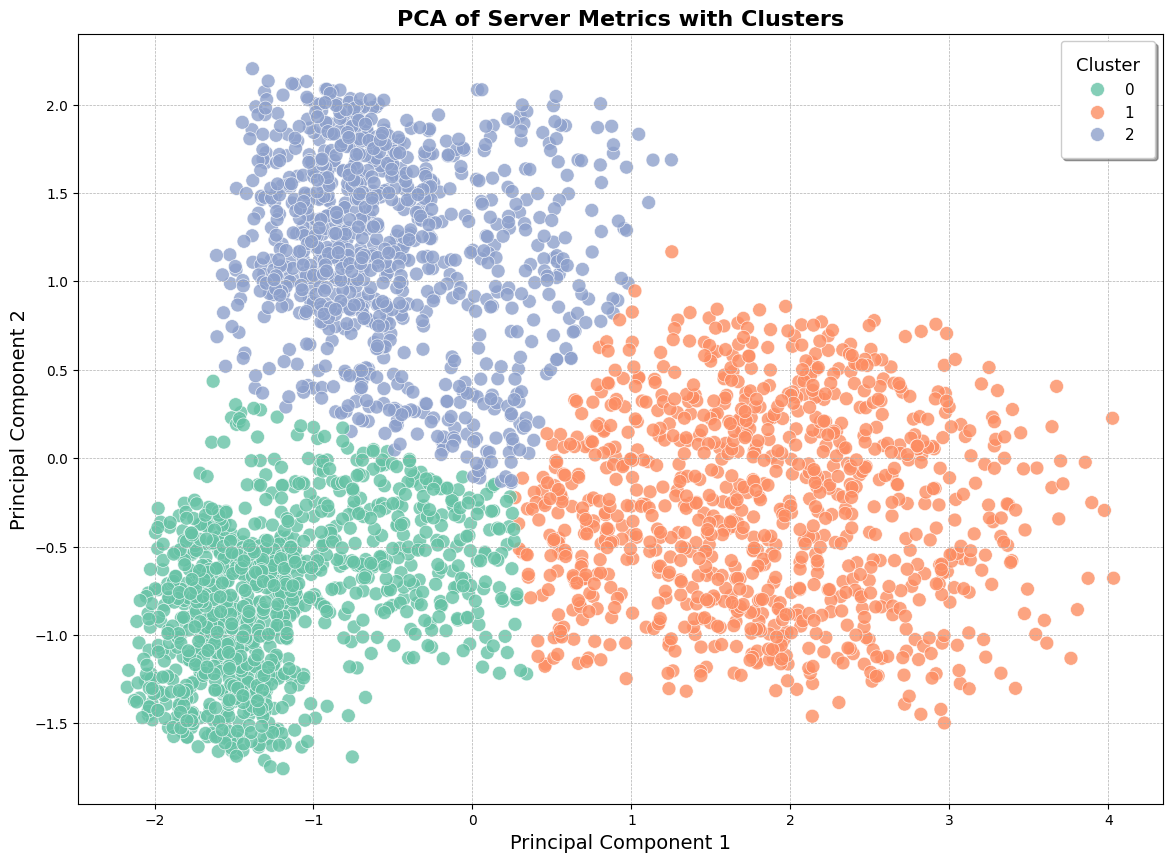

Shape of scaled data: (3000, 4)
Number of features: 4
PCA Loadings:
                                    PC1       PC2
CPU Utilization (%)            0.527929 -0.008755
Memory Utilization (%)         0.230183  0.957444
Network I/O Throughput (Mbps)  0.589364 -0.109567
Disk I/O Throughput (MB/s)     0.566530 -0.266870


In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def get_pca_loadings(pca, features):
    """
    Get PCA loadings for the specified features.

    Args:
    - pca (PCA): Fitted PCA model.
    - features (list): List of features.

    Returns:
    - pd.DataFrame: DataFrame containing PCA loadings.
    """
    try:
        if pca.components_.shape[1] != len(features):
            raise ValueError("Mismatch between PCA components and feature length.")
        loadings = pd.DataFrame(
            pca.components_.T, columns=["PC1", "PC2"], index=features
        )
        return loadings
    except Exception as e:
        logging.error(f"An error occurred while retrieving PCA loadings: {e}")
        return pd.DataFrame()


# Ensure the correct columns are selected for scaling and PCA
numeric_server_metrics = server_metrics.select_dtypes(include="number").drop(
    columns=["Cluster"]
)

# Normalize/Scale Data
scaler = StandardScaler()
server_metrics_scaled = scaler.fit_transform(numeric_server_metrics)


# PCA Analysis and Visualization
def apply_pca(scaled_data, clusters):
    try:
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(scaled_data)
        pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
        pca_df["Cluster"] = clusters

        plt.figure(figsize=(14, 10))
        sns.scatterplot(
            x="PC1",
            y="PC2",
            hue="Cluster",
            palette="Set2",
            data=pca_df,
            s=100,
            alpha=0.8,
            edgecolor="w",
            linewidth=0.5,
        )
        plt.title("PCA of Server Metrics with Clusters", fontsize=16, weight="bold")
        plt.xlabel("Principal Component 1", fontsize=14)
        plt.ylabel("Principal Component 2", fontsize=14)
        plt.grid(True, linestyle="--", linewidth=0.5)
        plt.legend(
            title="Cluster",
            title_fontsize="13",
            fontsize="11",
            loc="upper right",
            frameon=True,
            shadow=True,
            borderpad=1,
        )
        plt.show()

        return pca_df, pca
    except Exception as e:
        logging.error(f"An error occurred during PCA: {e}")
        return None, None


# Apply PCA and visualize the clusters
pca_df, pca = apply_pca(server_metrics_scaled, server_clusters)

# Check the shape of the scaled data and the original feature columns
print(f"Shape of scaled data: {server_metrics_scaled.shape}")
print(f"Number of features: {len(numeric_server_metrics.columns)}")

# Get PCA loadings for feature interpretation
features = numeric_server_metrics.columns.tolist()
pca_loadings = get_pca_loadings(pca, features)
print("PCA Loadings:")
print(pca_loadings)

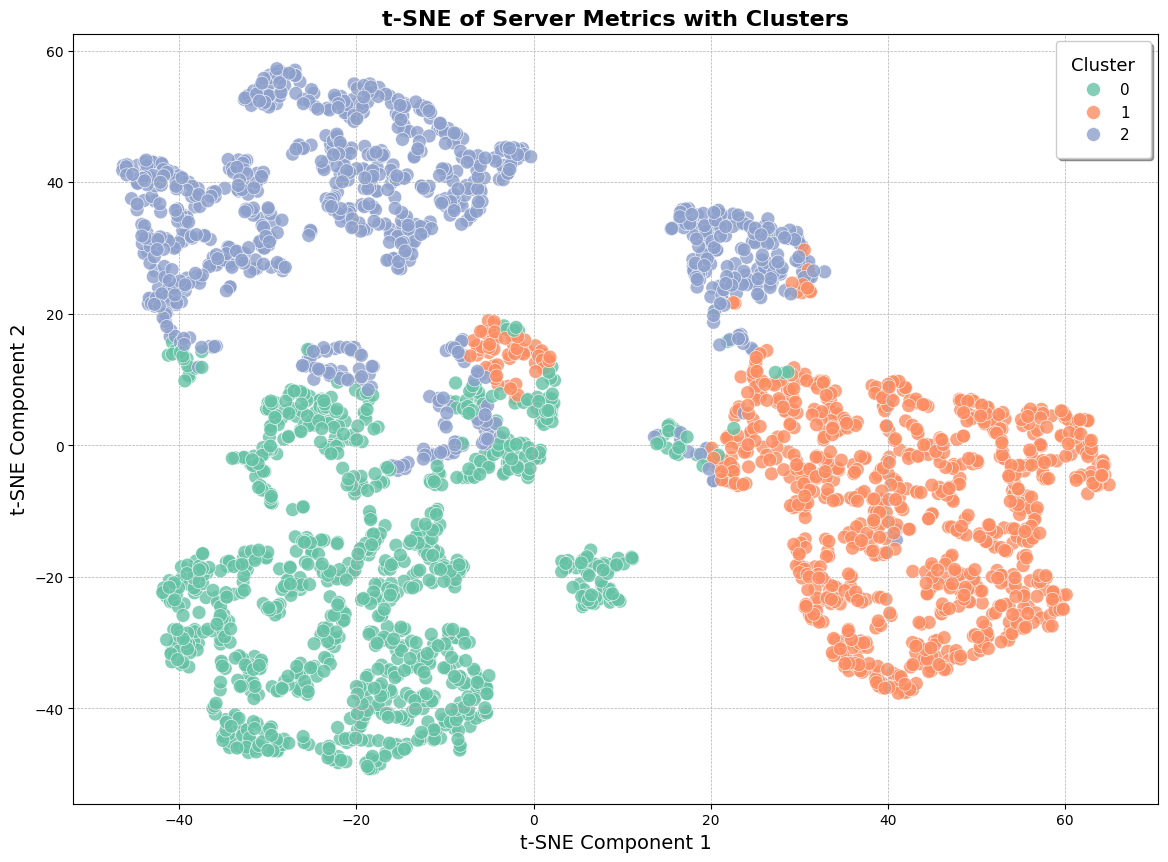

In [17]:
# Step 6: t-SNE Analysis and Visualization


def apply_tsne(scaled_data, clusters):
    """
    Apply t-SNE to the scaled data and plot the results.

    Args:
    - scaled_data (np.array): Scaled data.
    - clusters (np.array): Cluster labels.

    Returns:
    - pd.DataFrame: DataFrame containing t-SNE results and cluster labels.
    """
    try:
        tsne = TSNE(n_components=2, random_state=42)
        X_tsne = tsne.fit_transform(scaled_data)
        tsne_df = pd.DataFrame(data=X_tsne, columns=["TSNE1", "TSNE2"])
        tsne_df["Cluster"] = clusters

        plt.figure(figsize=(14, 10))
        sns.scatterplot(
            x="TSNE1",
            y="TSNE2",
            hue="Cluster",
            palette="Set2",
            data=tsne_df,
            s=100,
            alpha=0.8,
            edgecolor="w",
            linewidth=0.5,
        )
        plt.title("t-SNE of Server Metrics with Clusters", fontsize=16, weight="bold")
        plt.xlabel("t-SNE Component 1", fontsize=14)
        plt.ylabel("t-SNE Component 2", fontsize=14)
        plt.grid(True, linestyle="--", linewidth=0.5)
        plt.legend(
            title="Cluster",
            title_fontsize="13",
            fontsize="11",
            loc="upper right",
            frameon=True,
            shadow=True,
            borderpad=1,
        )
        plt.show()

        return tsne_df
    except Exception as e:
        logging.error(f"An error occurred during t-SNE: {e}")
        return None


# Apply t-SNE and visualize the clusters
tsne_df = apply_tsne(server_metrics_scaled, server_clusters)

Calinski-Harabasz Index: 2247.517844967138
Davies-Bouldin Index: 0.9558127952031694
Cluster Counts:
Cluster
0    1069
1     976
2     955
Name: count, dtype: int64


/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/3052406758.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


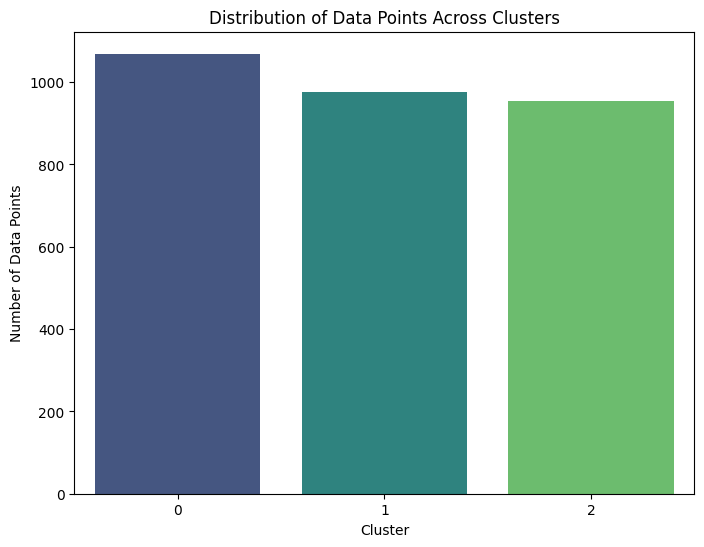

In [18]:
# Step 7: Evaluate Clustering Model Performance

from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(server_metrics_scaled, server_clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(server_metrics_scaled, server_clusters)
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Check cluster distribution
cluster_counts = server_metrics["Cluster"].value_counts().sort_index()
print("Cluster Counts:")
print(cluster_counts)

# Visualize cluster distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Data Points Across Clusters")
plt.show()

--- KMeans ---
Silhouette Score: 0.40290237786432576
Calinski-Harabasz Index: 2247.517844967138
Davies-Bouldin Index: 0.9558127952031694
Cluster Counts:
0     955
1     976
2    1069
Name: count, dtype: int64


/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/1871024455.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


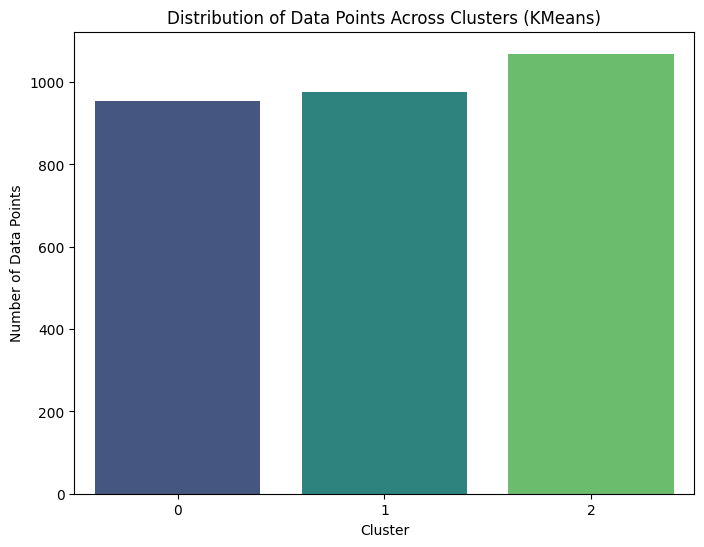

--- Agglomerative Clustering ---
Silhouette Score: 0.363782184903816
Calinski-Harabasz Index: 1841.7452174103212
Davies-Bouldin Index: 0.9283390918664819
Cluster Counts:
0    1144
1    1243
2     613
Name: count, dtype: int64


/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/1871024455.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


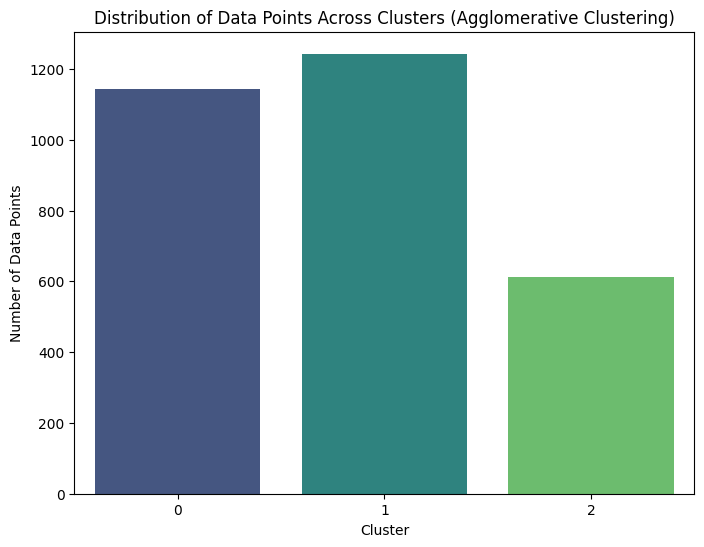

--- DBSCAN ---
Silhouette Score: -0.1530966079343188
Calinski-Harabasz Index: 7.688469732554705
Davies-Bouldin Index: 1.093857505819631
Cluster Counts:
0    2913
1       7
2       7
3       5
4       5
Name: count, dtype: int64


/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/1871024455.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


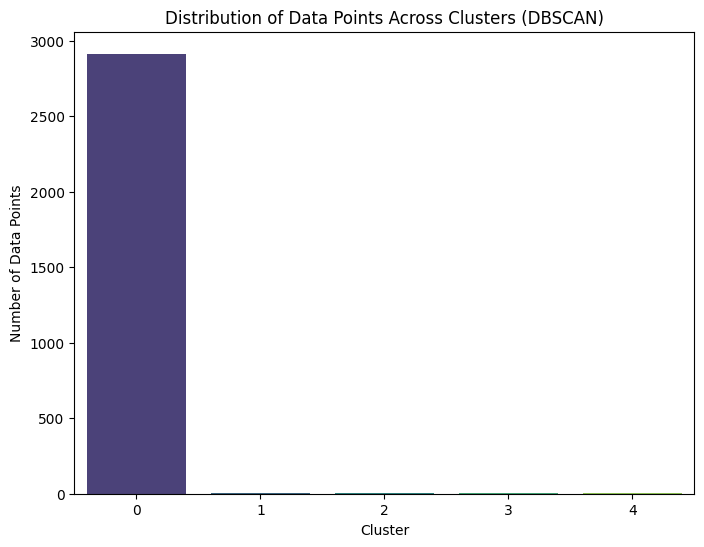

--- KMeans ---
Silhouette Score: 0.40290237786432576
Calinski-Harabasz Index: 2247.517844967138
Davies-Bouldin Index: 0.9558127952031694
Cluster Counts:
0     955
1     976
2    1069
Name: count, dtype: int64


/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/1871024455.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


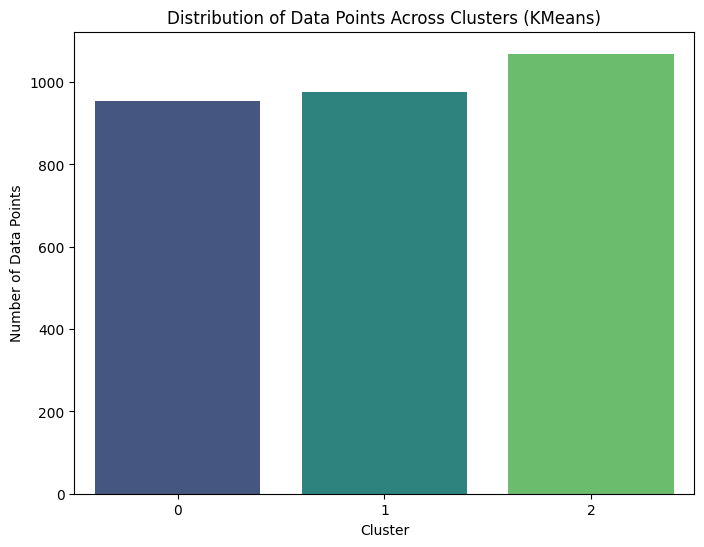

--- Agglomerative Clustering ---
Silhouette Score: 0.363782184903816
Calinski-Harabasz Index: 1841.7452174103212
Davies-Bouldin Index: 0.9283390918664819
Cluster Counts:
0    1144
1    1243
2     613
Name: count, dtype: int64


/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/1871024455.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


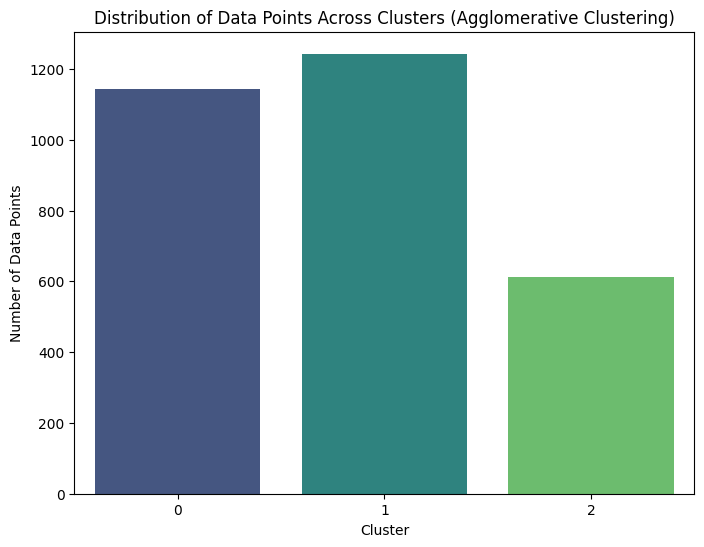

--- DBSCAN ---
Silhouette Score: -0.1530966079343188
Calinski-Harabasz Index: 7.688469732554705
Davies-Bouldin Index: 1.093857505819631
Cluster Counts:
0    2913
1       7
2       7
3       5
4       5
Name: count, dtype: int64


/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/1871024455.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


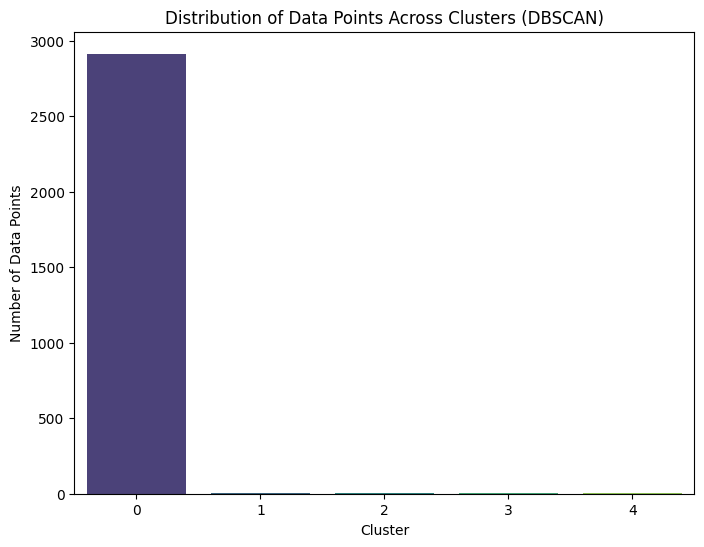

Performance Metrics Summary:
                  Algorithm  Silhouette Score  Calinski-Harabasz Index  \
0                    KMeans          0.402902              2247.517845   
1  Agglomerative Clustering          0.363782              1841.745217   
2                    DBSCAN         -0.153097                 7.688470   

   Davies-Bouldin Index  
0              0.955813  
1              0.928339  
2              1.093858  


/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/1871024455.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Algorithm", y="Silhouette Score", data=performance_df, palette="viridis")
/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/1871024455.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/1871024455.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


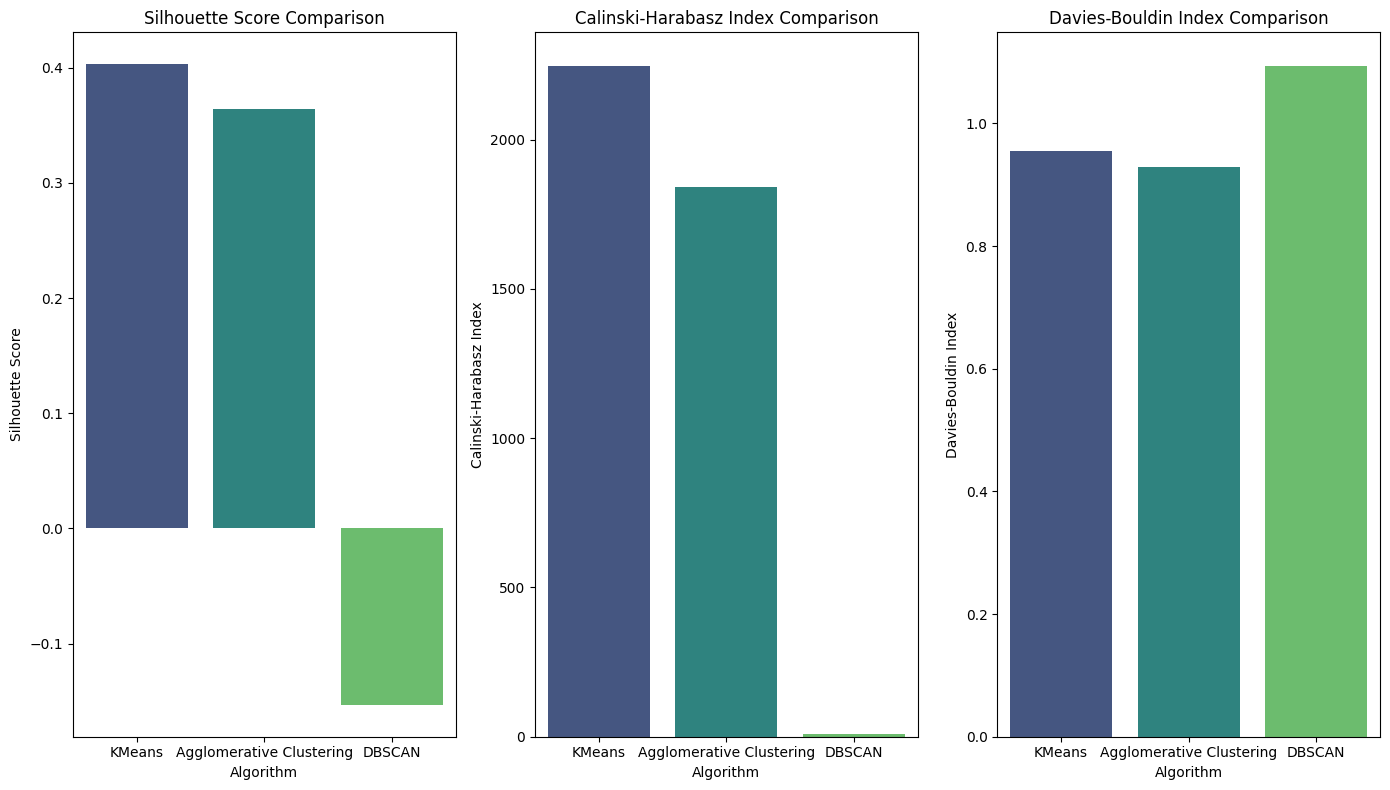

The best clustering algorithm based on Silhouette Score is: KMeans
PCA Visualization:
PCA of Server Metrics with KMeans Clusters


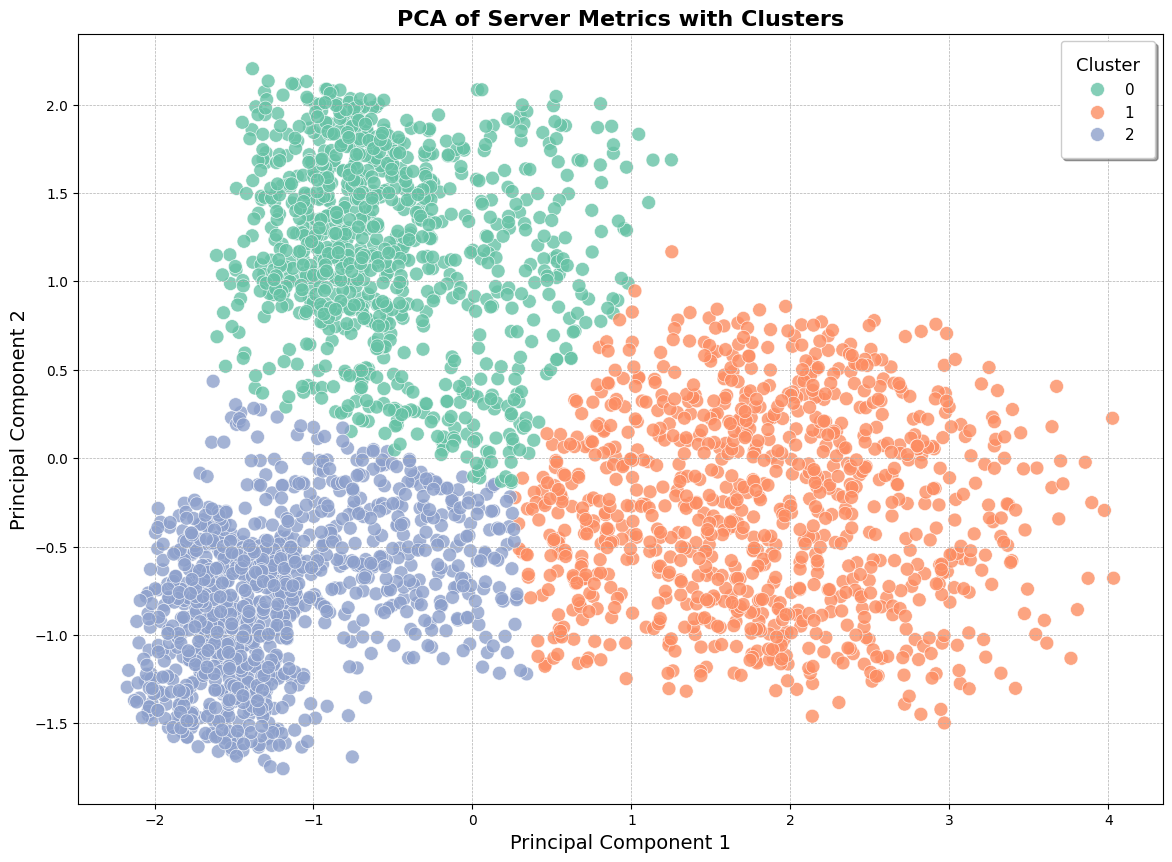

PCA of Server Metrics with Agglomerative Clustering Clusters


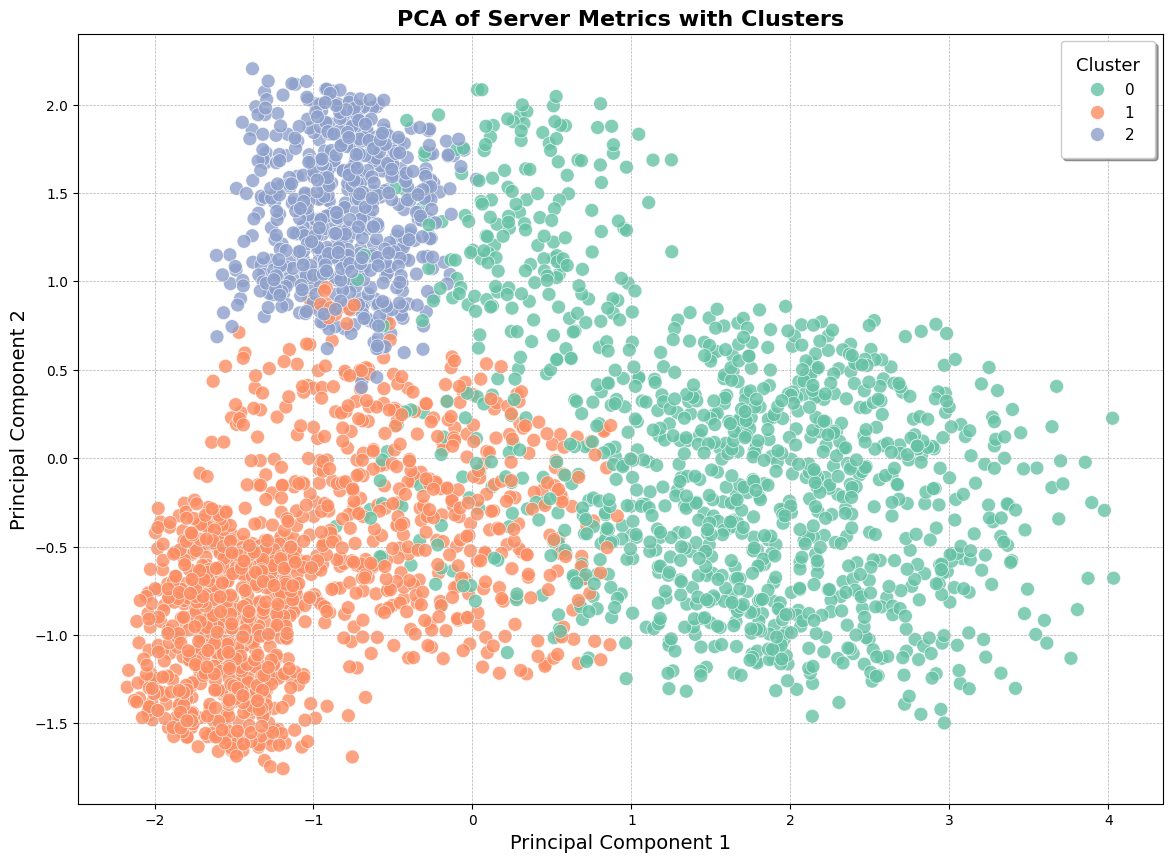

PCA of Server Metrics with DBSCAN Clusters


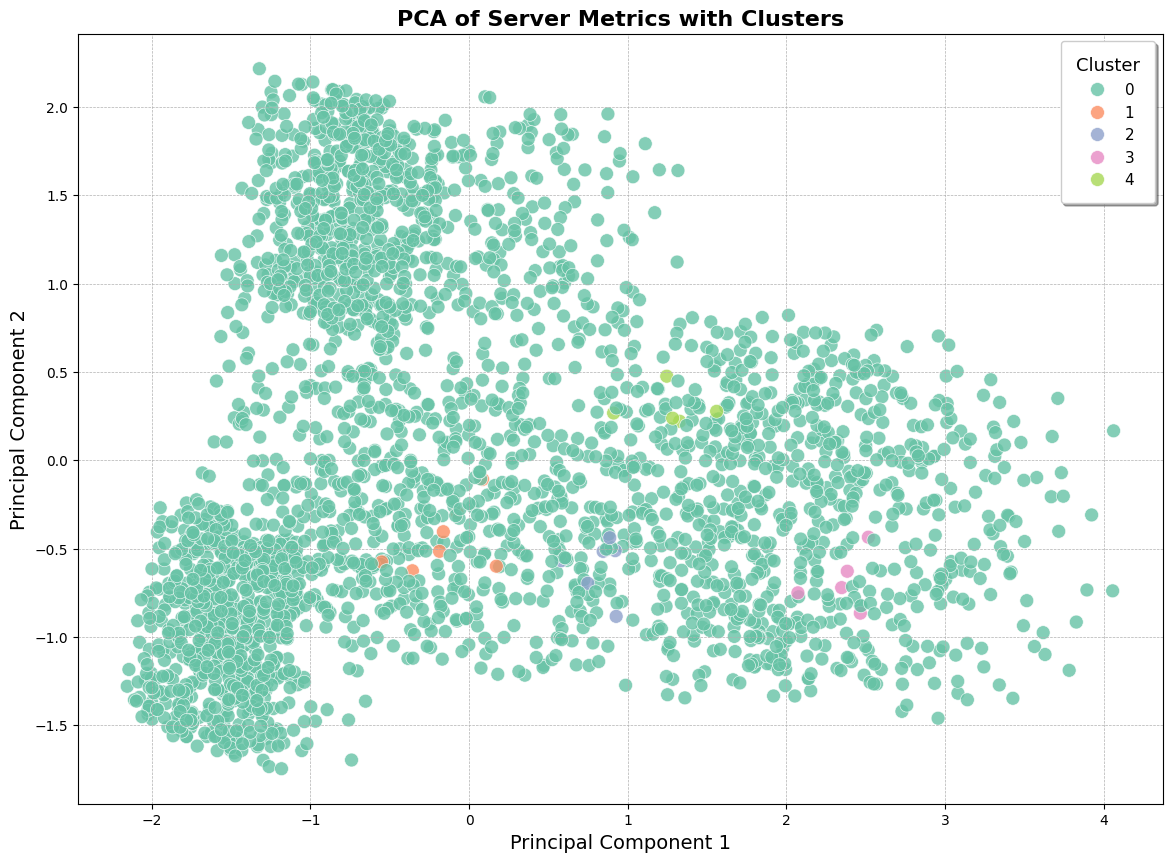

<Figure size 640x480 with 0 Axes>

t-SNE Visualization:
t-SNE of Server Metrics with KMeans Clusters


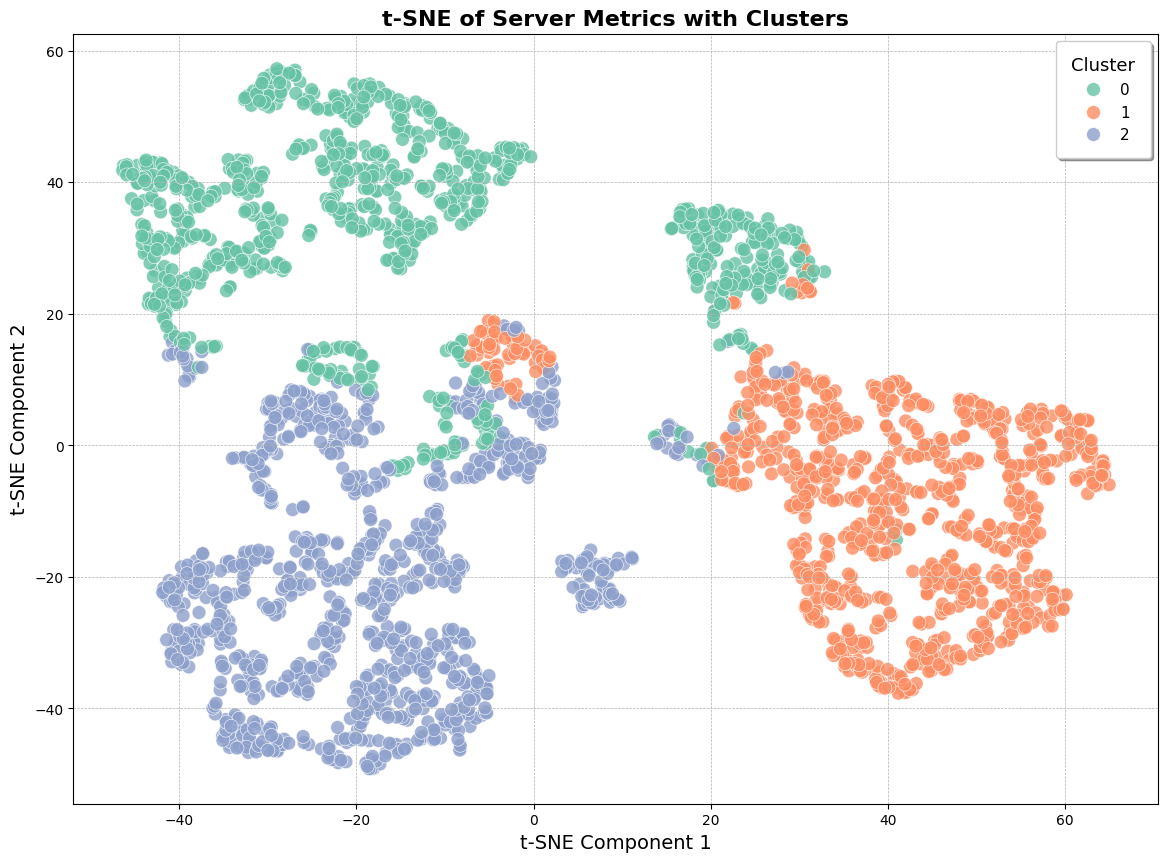

t-SNE of Server Metrics with Agglomerative Clustering Clusters


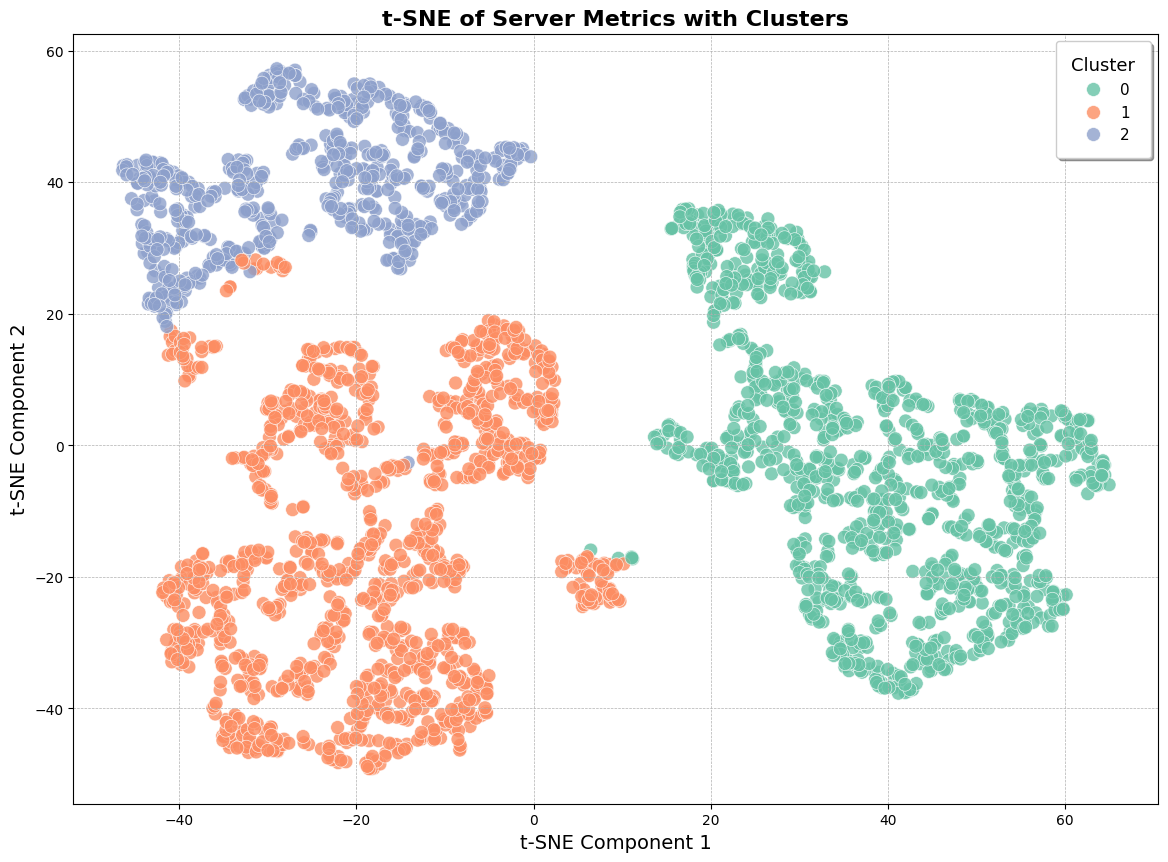

t-SNE of Server Metrics with DBSCAN Clusters


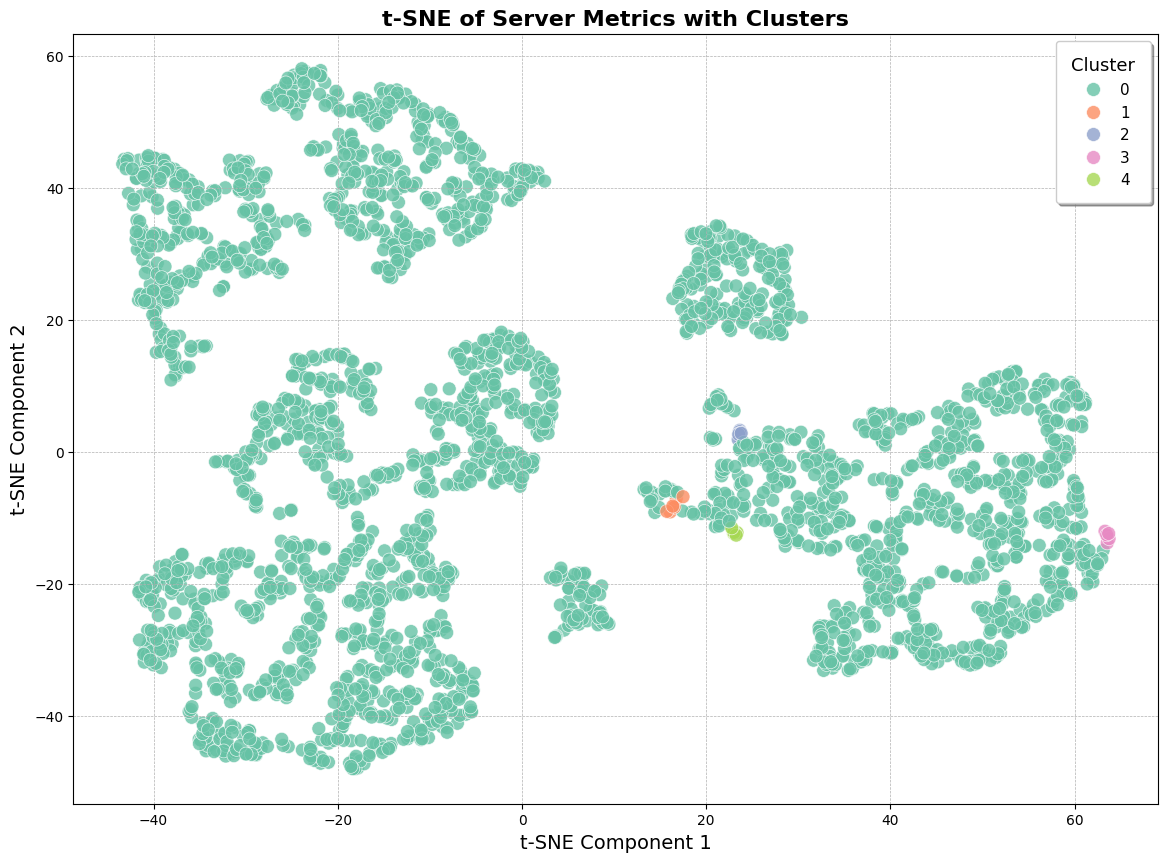

<Figure size 640x480 with 0 Axes>

In [19]:
# Step 8: Compare Clustering Algorithms

from sklearn.cluster import AgglomerativeClustering, DBSCAN


# Function to evaluate clustering performance
def evaluate_clustering(scaled_data, clusters, algorithm_name):
    silhouette_avg = silhouette_score(scaled_data, clusters)
    calinski_harabasz = calinski_harabasz_score(scaled_data, clusters)
    davies_bouldin = davies_bouldin_score(scaled_data, clusters)
    cluster_counts = pd.Series(clusters).value_counts().sort_index()

    print(f"--- {algorithm_name} ---")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")
    print("Cluster Counts:")
    print(cluster_counts)

    # Visualize cluster distribution
    plt.figure(figsize=(8, 6))
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
    plt.xlabel("Cluster")
    plt.ylabel("Number of Data Points")
    plt.title(f"Distribution of Data Points Across Clusters ({algorithm_name})")
    plt.show()

    return silhouette_avg, calinski_harabasz, davies_bouldin


# Dictionary to store performance metrics for each algorithm
performance_metrics = {
    "Algorithm": [],
    "Silhouette Score": [],
    "Calinski-Harabasz Index": [],
    "Davies-Bouldin Index": [],
}

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(server_metrics_scaled)
evaluate_clustering(server_metrics_scaled, kmeans_clusters, "KMeans")

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(server_metrics_scaled)
evaluate_clustering(server_metrics_scaled, agg_clusters, "Agglomerative Clustering")

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(server_metrics_scaled)
# Filter out noise points (labeled as -1) for evaluation
dbscan_clusters_filtered = dbscan_clusters[dbscan_clusters != -1]
server_metrics_scaled_filtered = server_metrics_scaled[dbscan_clusters != -1]
evaluate_clustering(server_metrics_scaled_filtered, dbscan_clusters_filtered, "DBSCAN")

# Evaluate KMeans
kmeans_silhouette, kmeans_calinski, kmeans_davies = evaluate_clustering(
    server_metrics_scaled, kmeans_clusters, "KMeans"
)
performance_metrics["Algorithm"].append("KMeans")
performance_metrics["Silhouette Score"].append(kmeans_silhouette)
performance_metrics["Calinski-Harabasz Index"].append(kmeans_calinski)
performance_metrics["Davies-Bouldin Index"].append(kmeans_davies)

# Evaluate Agglomerative Clustering
agg_silhouette, agg_calinski, agg_davies = evaluate_clustering(
    server_metrics_scaled, agg_clusters, "Agglomerative Clustering"
)
performance_metrics["Algorithm"].append("Agglomerative Clustering")
performance_metrics["Silhouette Score"].append(agg_silhouette)
performance_metrics["Calinski-Harabasz Index"].append(agg_calinski)
performance_metrics["Davies-Bouldin Index"].append(agg_davies)

# Evaluate DBSCAN
dbscan_silhouette, dbscan_calinski, dbscan_davies = evaluate_clustering(
    server_metrics_scaled_filtered, dbscan_clusters_filtered, "DBSCAN"
)
performance_metrics["Algorithm"].append("DBSCAN")
performance_metrics["Silhouette Score"].append(dbscan_silhouette)
performance_metrics["Calinski-Harabasz Index"].append(dbscan_calinski)
performance_metrics["Davies-Bouldin Index"].append(dbscan_davies)

# Create DataFrame from performance metrics
performance_df = pd.DataFrame(performance_metrics)
print("Performance Metrics Summary:")
print(performance_df)

# Plot the performance metrics
plt.figure(figsize=(14, 8))

# Silhouette Score
plt.subplot(1, 3, 1)
sns.barplot(x="Algorithm", y="Silhouette Score", data=performance_df, palette="viridis")
plt.title("Silhouette Score Comparison")

# Calinski-Harabasz Index
plt.subplot(1, 3, 2)
sns.barplot(
    x="Algorithm", y="Calinski-Harabasz Index", data=performance_df, palette="viridis"
)
plt.title("Calinski-Harabasz Index Comparison")

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
sns.barplot(
    x="Algorithm", y="Davies-Bouldin Index", data=performance_df, palette="viridis"
)
plt.title("Davies-Bouldin Index Comparison")

plt.tight_layout()
plt.show()

# Identify the best algorithm based on Silhouette Score
best_algorithm = performance_df.loc[performance_df["Silhouette Score"].idxmax()][
    "Algorithm"
]
print(f"The best clustering algorithm based on Silhouette Score is: {best_algorithm}")

# Visual Inspection with PCA for all algorithms
print("PCA Visualization:")

print("PCA of Server Metrics with KMeans Clusters")
apply_pca(server_metrics_scaled, kmeans_clusters)

print("PCA of Server Metrics with Agglomerative Clustering Clusters")
apply_pca(server_metrics_scaled, agg_clusters)

print("PCA of Server Metrics with DBSCAN Clusters")
apply_pca(server_metrics_scaled_filtered, dbscan_clusters_filtered)


plt.tight_layout()
plt.show()

# Visual Inspection with t-SNE for all algorithms
print("t-SNE Visualization:")

print("t-SNE of Server Metrics with KMeans Clusters")
apply_tsne(server_metrics_scaled, kmeans_clusters)

print("t-SNE of Server Metrics with Agglomerative Clustering Clusters")
apply_tsne(server_metrics_scaled, agg_clusters)

print("t-SNE of Server Metrics with DBSCAN Clusters")
apply_tsne(server_metrics_scaled_filtered, dbscan_clusters_filtered)

plt.tight_layout()
plt.show()

In [20]:
# Insights Based on PCA, t-SNE, and Clustering

# Display silhouette score
print(f"Silhouette Score: {silhouette_avg}")

# Display PCA loadings
print("PCA Loadings:")
print(pca_loadings)


# Function to generate dynamic insights based on analysis
def generate_insights(
    server_metrics, silhouette_avg, pca_loadings, server_clusters, num_clusters=3
):
    insights = f"""
    ### Insights from PCA, t-SNE, and Clustering

    1. **Silhouette Score**: The silhouette score of {silhouette_avg:.2f} indicates the average distance between clusters. A higher score suggests well-separated clusters, while a lower score indicates overlapping clusters.

    2. **Cluster Distribution**:
    """
    cluster_info = {}
    for cluster in range(num_clusters):
        cluster_data = server_metrics[server_metrics["Cluster"] == cluster]
        cpu_utilization_mean = cluster_data["CPU Utilization (%)"].mean()
        memory_utilization_mean = cluster_data["Memory Utilization (%)"].mean()
        network_io_mean = cluster_data["Network I/O Throughput (Mbps)"].mean()
        disk_io_mean = cluster_data["Disk I/O Throughput (MB/s)"].mean()
        server_types = cluster_data["Server Configuration"].value_counts().to_dict()

        cluster_info[cluster] = {
            "cpu_utilization_mean": cpu_utilization_mean,
            "memory_utilization_mean": memory_utilization_mean,
            "network_io_mean": network_io_mean,
            "disk_io_mean": disk_io_mean,
            "server_types": server_types,
        }

        insights += f"""
        - **Cluster {cluster}**:
            - Average CPU Utilization: {cpu_utilization_mean:.2f}%
            - Average Memory Utilization: {memory_utilization_mean:.2f}%
            - Average Network I/O Throughput: {network_io_mean:.2f} Mbps
            - Average Disk I/O Throughput: {disk_io_mean:.2f} MB/s
            - Server Configurations:
        """

        for config, count in server_types.items():
            insights += f"            - {count} instances of {config}\n"

    if not pca_loadings.empty:
        pc1_influences = pca_loadings["PC1"].abs().sort_values(ascending=False)
        pc2_influences = pca_loadings["PC2"].abs().sort_values(ascending=False)
        insights += f"""
        3. **PCA Analysis**:
            - **PC1 (Principal Component 1)** is primarily influenced by {pc1_influences.index[0]} ({pc1_influences.iloc[0]:.3f}) and {pc1_influences.index[1]} ({pc1_influences.iloc[1]:.3f}). This suggests that these metrics are key factors in explaining the variance in server performance.
            - **PC2 (Principal Component 2)** is strongly influenced by {pc2_influences.index[0]} ({pc2_influences.iloc[0]:.3f}) and {pc2_influences.index[1]} ({pc2_influences.iloc[1]:.3f}). This indicates that these metrics are critical in differentiating the performance characteristics of the servers.
        """
    else:
        insights += """
        3. **PCA Analysis**:
            - PCA loadings could not be calculated, so insights from PCA are not available.
        """

    insights += f"""
    4. **t-SNE Visualization**:
        - The t-SNE plot shows clear separation between the clusters, confirming that the clustering is meaningful and well-defined.

    ### Recommendations

    1. **Optimize Memory Utilization**: For servers in clusters with high memory utilization, focus on optimizing memory usage to prevent potential bottlenecks and improve overall performance.

    2. **Load Balancing for High CPU Utilization Servers**: For servers in clusters with high CPU utilization, consider load balancing strategies to distribute the load more evenly and prevent CPU overutilization.

    3. **Monitor Disk I/O**: Given the significant influence of Disk I/O Throughput on PC2, it's important to monitor and optimize disk performance, especially for servers with high disk activity.

    4. **Regular Performance Reviews**: Periodically review server performance metrics to ensure that the clusters remain balanced and to identify any emerging performance issues.

    By implementing these recommendations, you can enhance server performance, improve resource utilization, and ensure a more balanced load across your server infrastructure.
    """

    return insights, cluster_info


# Generate insights based on the current analysis
dynamic_insights, cluster_info = generate_insights(
    server_metrics, silhouette_avg, pca_loadings, server_clusters
)
print(dynamic_insights)

Silhouette Score: 0.5200705849093704
PCA Loadings:
                                    PC1       PC2
CPU Utilization (%)            0.527929 -0.008755
Memory Utilization (%)         0.230183  0.957444
Network I/O Throughput (Mbps)  0.589364 -0.109567
Disk I/O Throughput (MB/s)     0.566530 -0.266870

    ### Insights from PCA, t-SNE, and Clustering

    1. **Silhouette Score**: The silhouette score of 0.52 indicates the average distance between clusters. A higher score suggests well-separated clusters, while a lower score indicates overlapping clusters.

    2. **Cluster Distribution**:
    
        - **Cluster 0**:
            - Average CPU Utilization: 6.64%
            - Average Memory Utilization: 24.46%
            - Average Network I/O Throughput: 4.45 Mbps
            - Average Disk I/O Throughput: 3.14 MB/s
            - Server Configurations:
                    - 706 instances of EC2 apache Servers (t2.medium)
            - 361 instances of EC2 app pet (t2.small)
            

Aligned Data Columns:
Index(['Server Configuration_server', 'CPU Utilization (%)',
       'Memory Utilization (%)', 'Network I/O Throughput (Mbps)',
       'Disk I/O Throughput (MB/s)', 'Cluster',
       'Server Configuration_business', 'Response Time (ms)',
       'Customer Satisfaction (CSAT)', 'Operational Costs ($)',
       'Service Uptime (%)'],
      dtype='object')
Correlation with Business Metrics:
                               CPU Utilization (%)  Memory Utilization (%)  \
CPU Utilization (%)                       1.000000                0.187809   
Memory Utilization (%)                    0.187809                1.000000   
Network I/O Throughput (Mbps)             0.500984                0.189658   
Disk I/O Throughput (MB/s)                0.466505                0.091597   
Response Time (ms)                        0.975512                0.293548   
Customer Satisfaction (CSAT)             -0.975512               -0.293548   
Operational Costs ($)                     0.

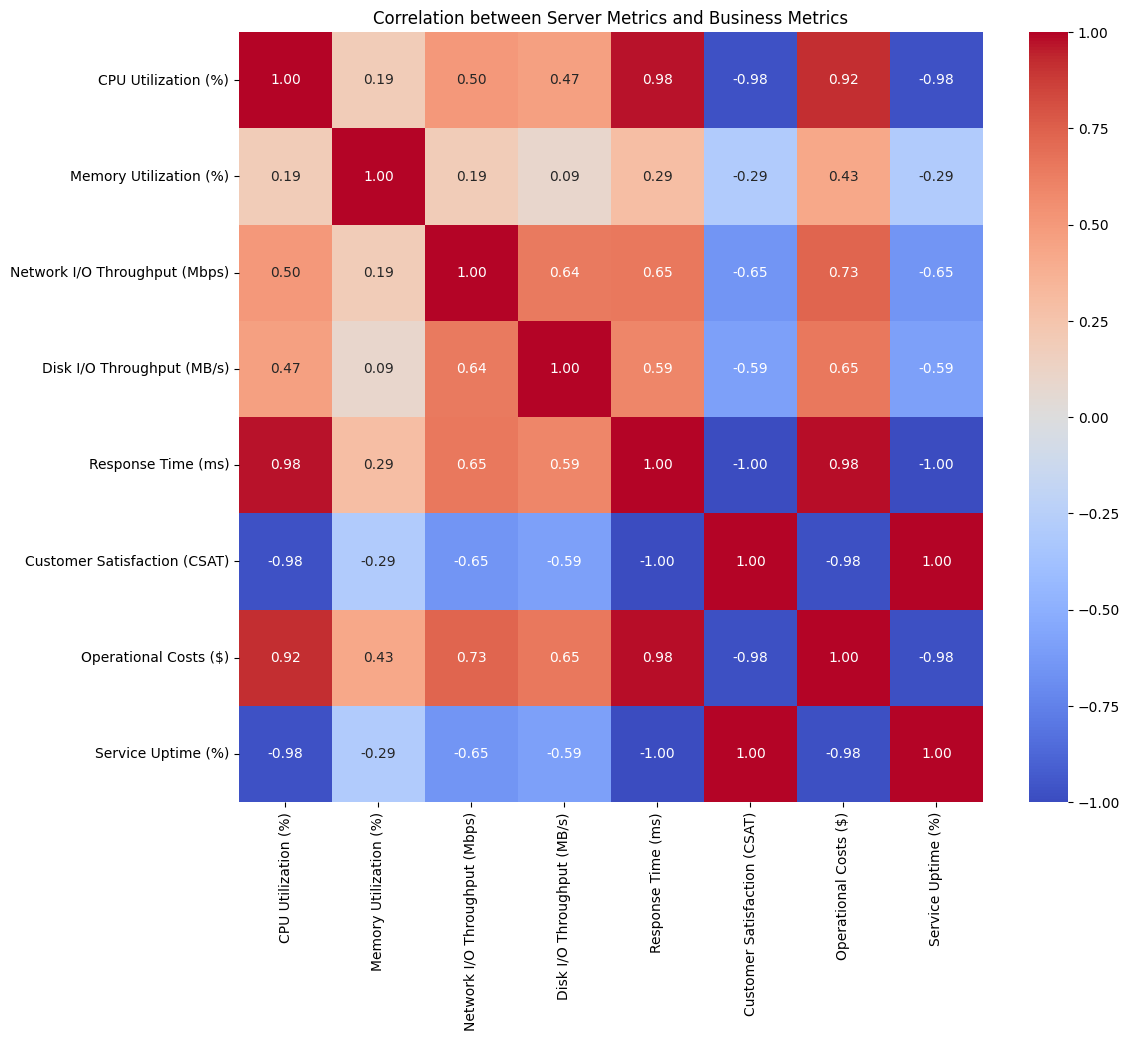

In [21]:
# Step 7: Business Analysis

# Ensure 'Timestamp' column is present and convert to datetime
if "Timestamp" not in server_metrics.columns:
    raise KeyError("The 'Timestamp' column is missing in the server_metrics DataFrame.")
if "Timestamp" not in business_metrics.columns:
    raise KeyError(
        "The 'Timestamp' column is missing in the business_metrics DataFrame."
    )

server_metrics["Timestamp"] = pd.to_datetime(server_metrics["Timestamp"])
business_metrics["Timestamp"] = pd.to_datetime(business_metrics["Timestamp"])

# Aligning data based on Timestamp
server_metrics.set_index("Timestamp", inplace=True)
business_metrics.set_index("Timestamp", inplace=True)

# Ensure both dataframes are aligned
aligned_data = server_metrics.join(
    business_metrics, how="inner", lsuffix="_server", rsuffix="_business"
)

# Print columns to check names after joining
print("Aligned Data Columns:")
print(aligned_data.columns)

# Check for and drop missing values, if any
aligned_data.dropna(inplace=True)

# Split back into server and business metrics
server_cols = [
    "CPU Utilization (%)",
    "Memory Utilization (%)",
    "Network I/O Throughput (Mbps)",
    "Disk I/O Throughput (MB/s)",
]
business_cols = [
    "Response Time (ms)",
    "Customer Satisfaction (CSAT)",
    "Operational Costs ($)",
    "Service Uptime (%)",
]

numeric_server_metrics = aligned_data[server_cols]
numeric_business_metrics = aligned_data[business_cols]

# Rename columns for easier access
numeric_server_metrics.columns = [
    "CPU Utilization (%)",
    "Memory Utilization (%)",
    "Network I/O Throughput (Mbps)",
    "Disk I/O Throughput (MB/s)",
]
numeric_business_metrics.columns = [
    "Response Time (ms)",
    "Customer Satisfaction (CSAT)",
    "Operational Costs ($)",
    "Service Uptime (%)",
]

# Compute the correlation matrix between server metrics and business metrics
correlation_matrix = numeric_server_metrics.join(numeric_business_metrics).corr()
print("Correlation with Business Metrics:")
print(correlation_matrix)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of correlations between server metrics and business metrics
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Server Metrics and Business Metrics")
plt.show()

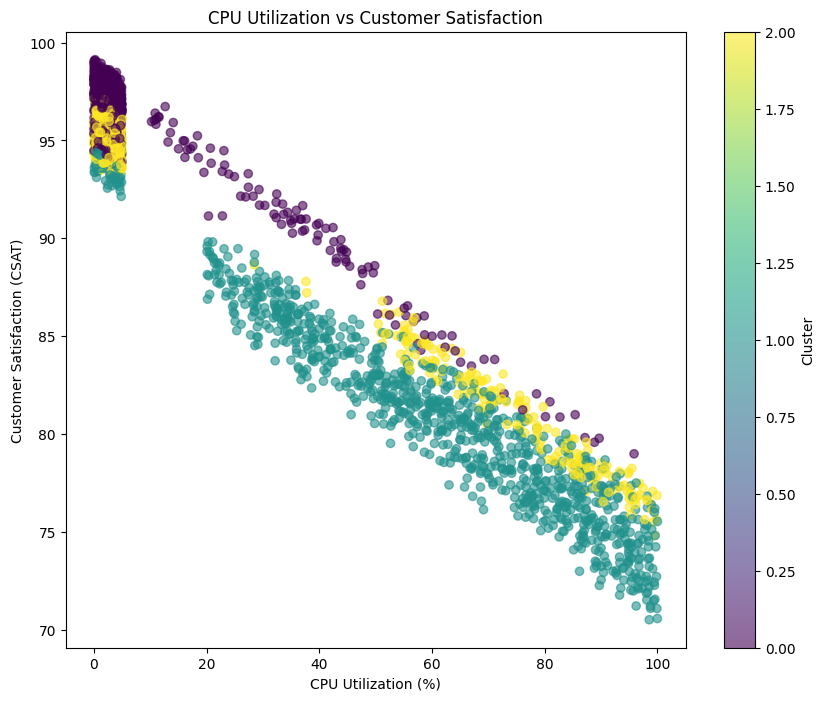

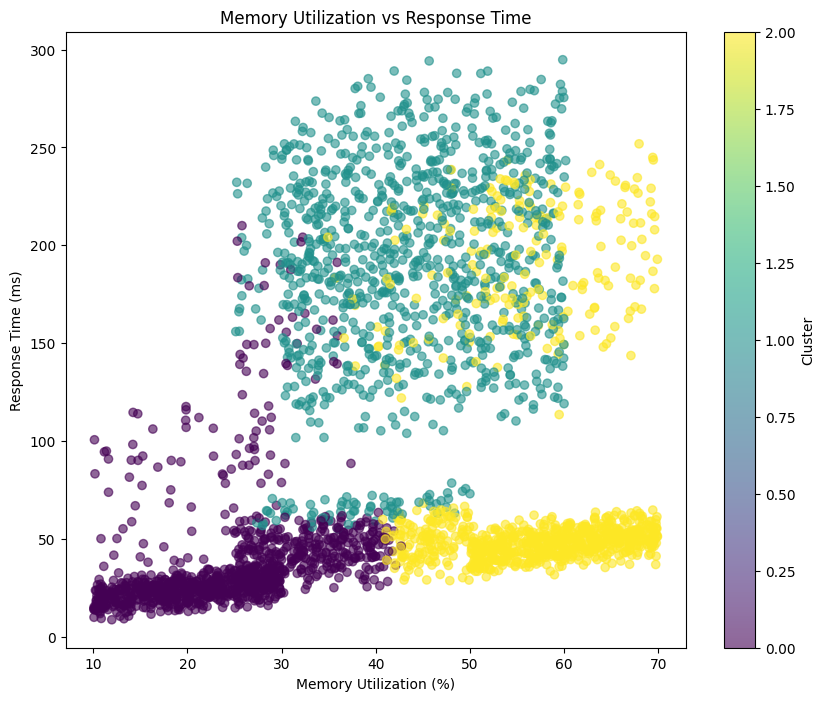

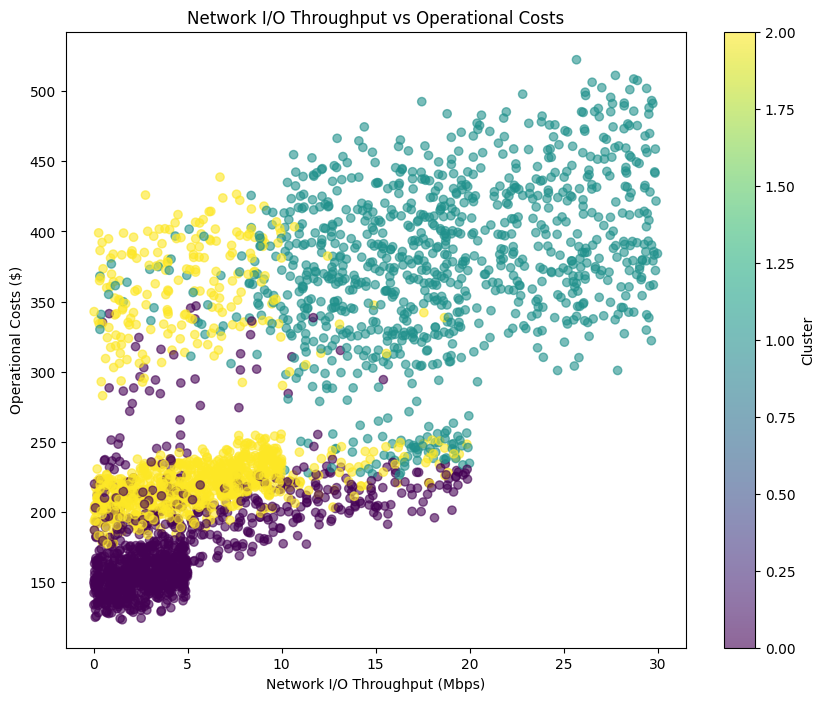

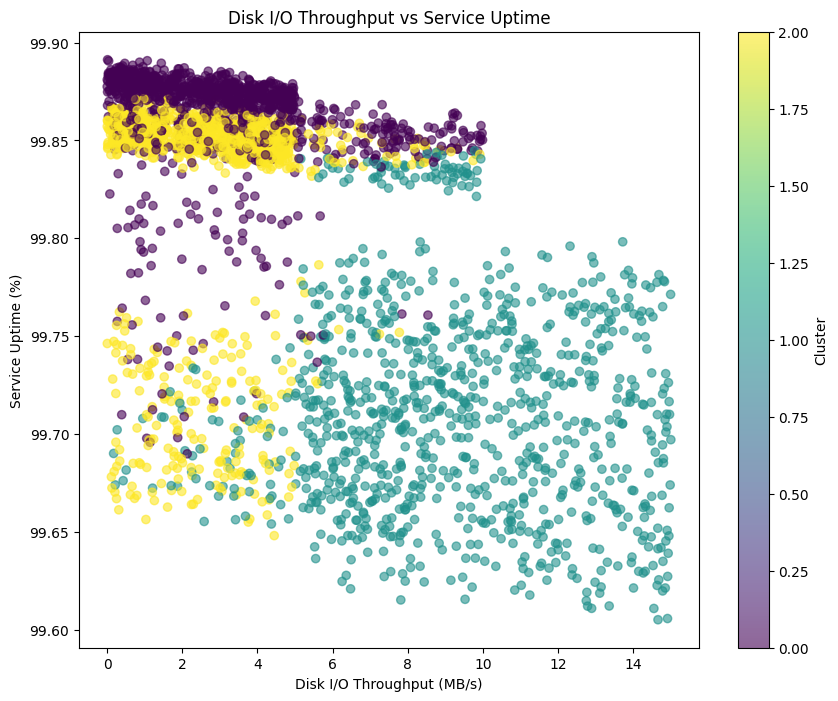


Insights:
CPU Utilization (%) and Customer Satisfaction (CSAT): -0.98
Memory Utilization (%) and Response Time (ms): 0.29
Network I/O Throughput (Mbps) and Operational Costs ($): 0.73
Disk I/O Throughput (MB/s) and Service Uptime (%): -0.59

Interpretation of Insights:
A strong negative correlation of -0.98 between CPU Utilization (%) and Customer Satisfaction (CSAT) suggests that as CPU Utilization (%) increases, Customer Satisfaction (CSAT) decreases.
A weak correlation of 0.29 between Memory Utilization (%) and Response Time (ms) suggests that changes in Memory Utilization (%) have little impact on Response Time (ms).
A strong positive correlation of 0.73 between Network I/O Throughput (Mbps) and Operational Costs ($) suggests that as Network I/O Throughput (Mbps) increases, Operational Costs ($) also increases.
A strong negative correlation of -0.59 between Disk I/O Throughput (MB/s) and Service Uptime (%) suggests that as Disk I/O Throughput (MB/s) increases, Service Uptime (%) d

/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/1811198254.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/1811198254.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/1811198254.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/1811198254.py:148: UserWarning: set_ticklabels() should only be used with a fixed 

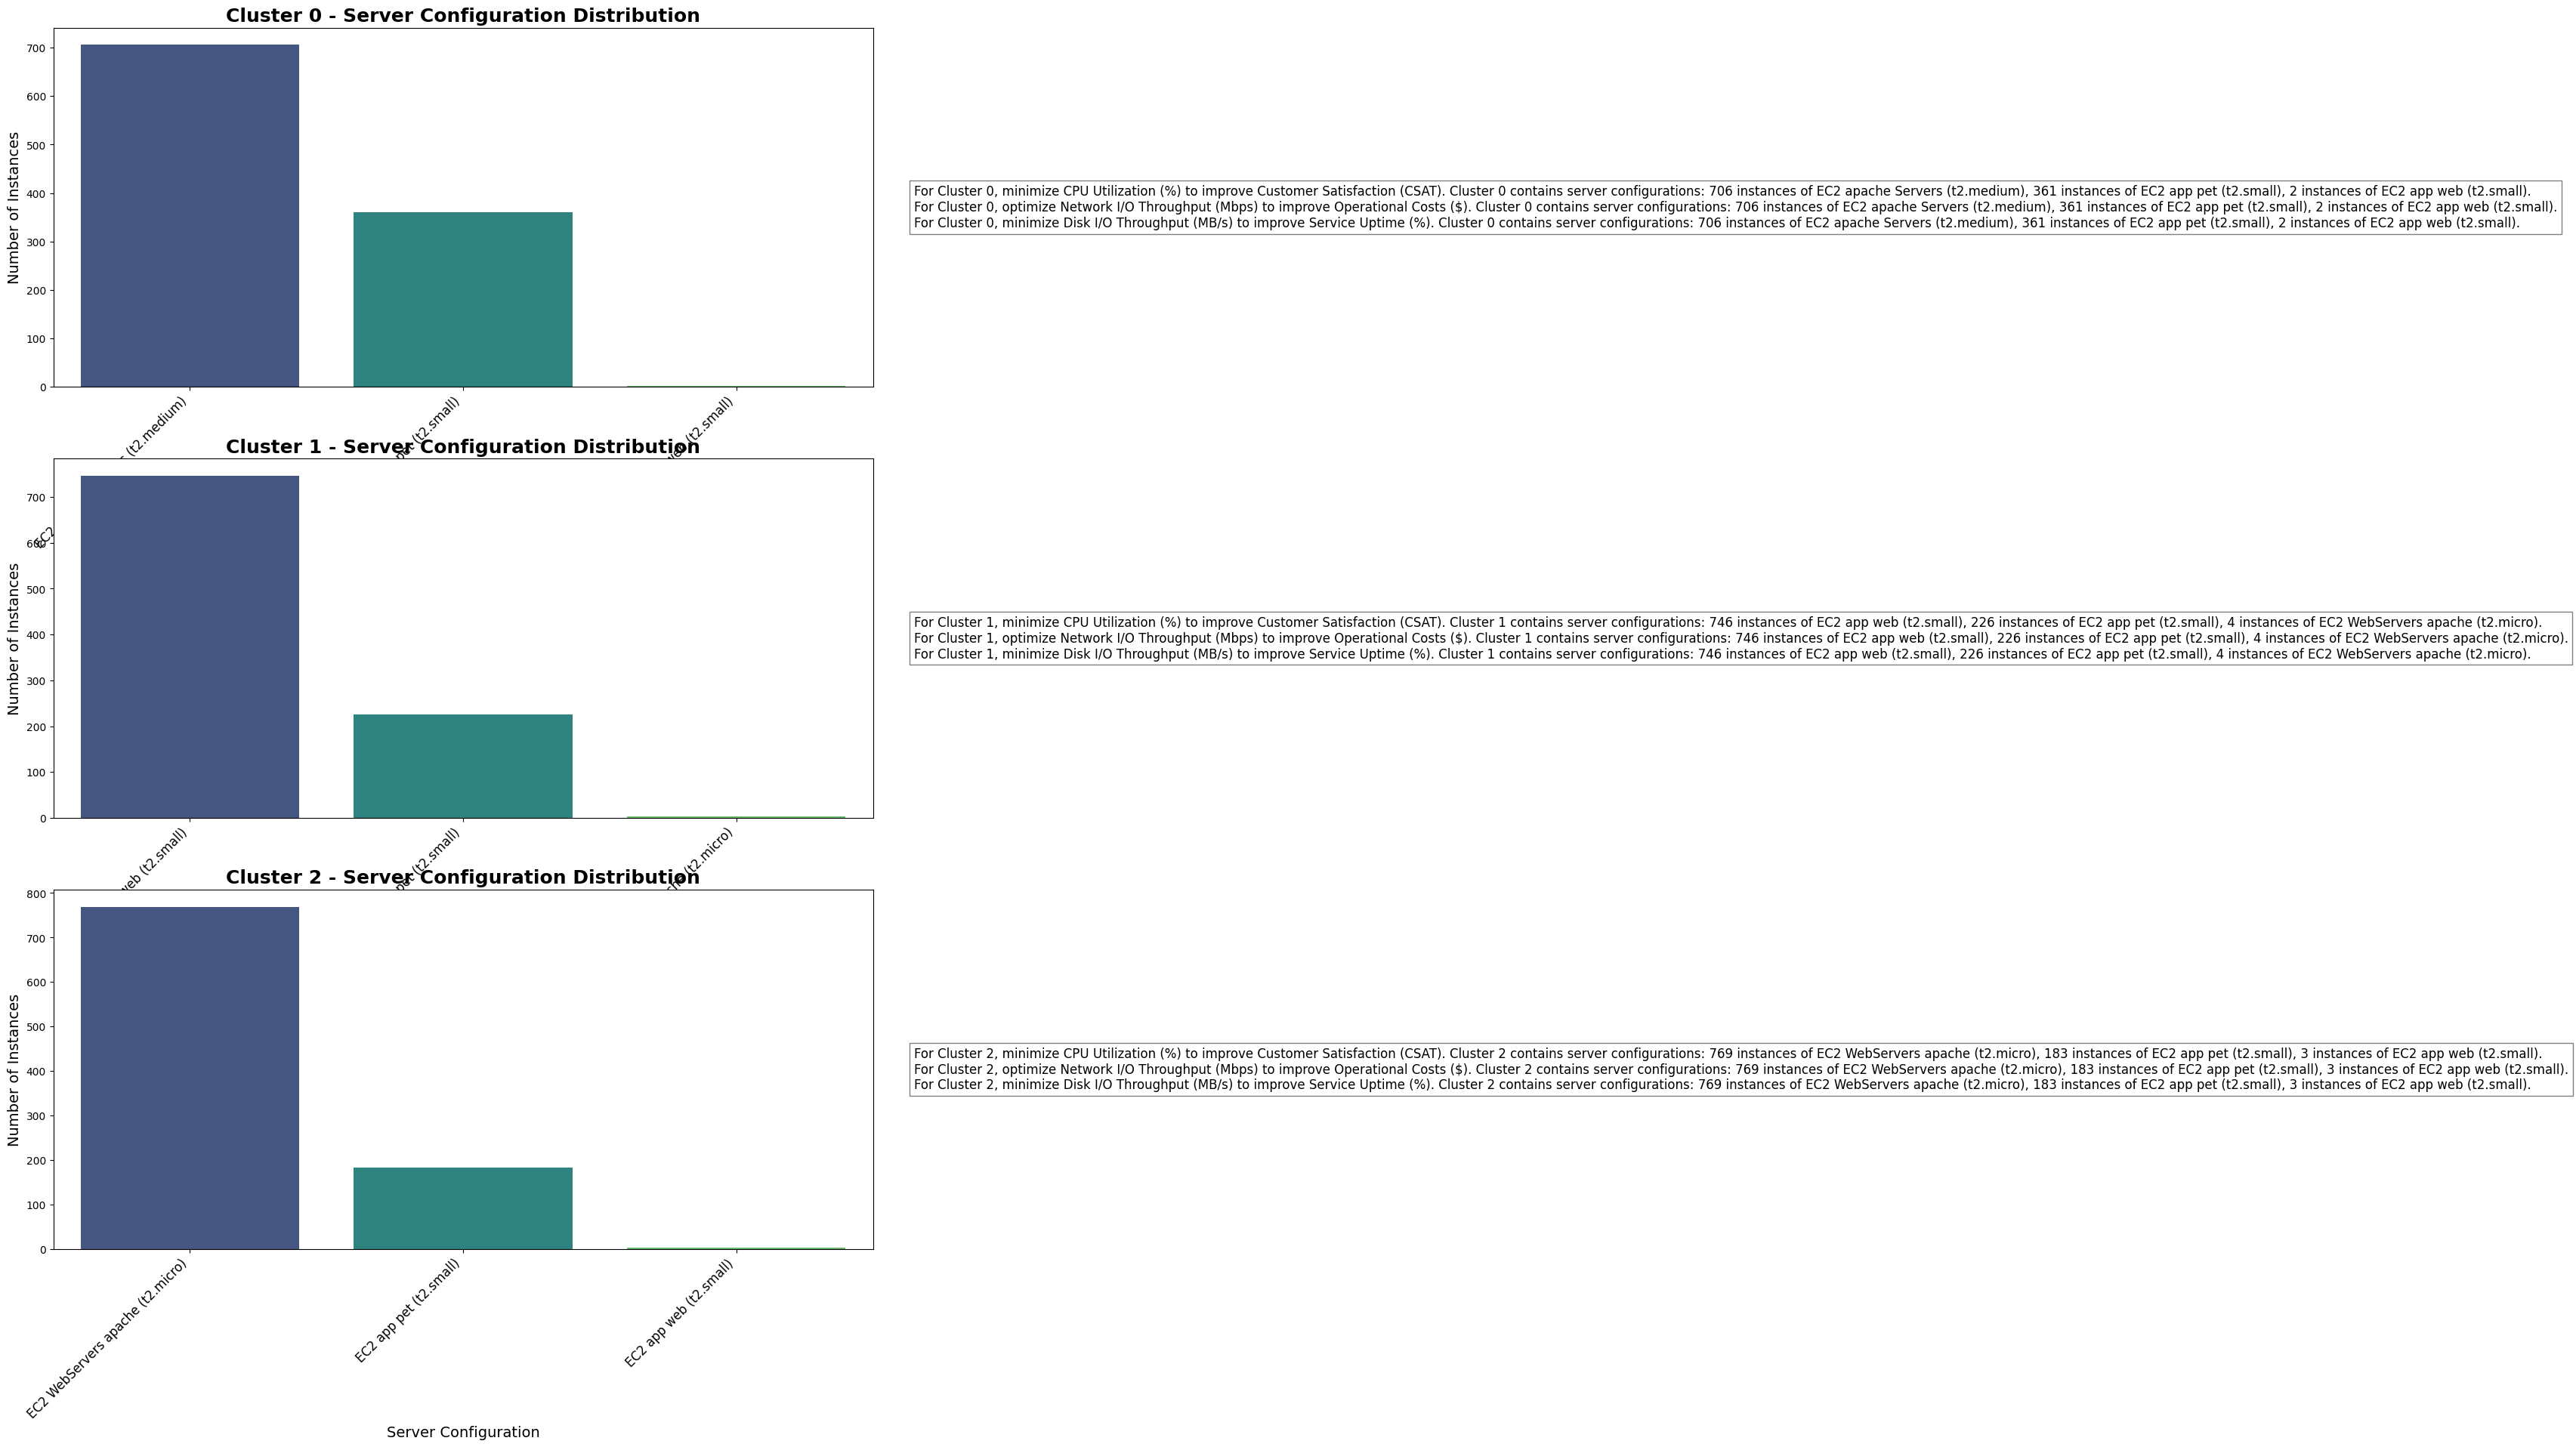

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 8: Optimization Recommendations & Business Insights

# Scatter plot function
def plot_scatter(x, y, clusters, xlabel, ylabel, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, c=clusters, cmap="viridis", alpha=0.6)
    plt.colorbar(label="Cluster")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


# Assuming aligned_data and correlation_matrix are defined appropriately

# Define scatter plots with feature pairs and titles
scatter_plots = [
    (
        "CPU Utilization (%)",
        "Customer Satisfaction (CSAT)",
        "CPU Utilization vs Customer Satisfaction",
    ),
    (
        "Memory Utilization (%)",
        "Response Time (ms)",
        "Memory Utilization vs Response Time",
    ),
    (
        "Network I/O Throughput (Mbps)",
        "Operational Costs ($)",
        "Network I/O Throughput vs Operational Costs",
    ),
    (
        "Disk I/O Throughput (MB/s)",
        "Service Uptime (%)",
        "Disk I/O Throughput vs Service Uptime",
    ),
]

# Generate Scatter Plots
for x_feature, y_feature, plot_title in scatter_plots:
    plot_scatter(
        aligned_data[x_feature],
        aligned_data[y_feature],
        aligned_data["Cluster"],
        x_feature,
        y_feature,
        plot_title,
    )

# Generate Insights dynamically
insights = {}
for x_feature, y_feature, _ in scatter_plots:
    correlation = correlation_matrix.loc[x_feature, y_feature]
    insights[f"{x_feature} and {y_feature}"] = correlation

print("\nInsights:")
for k, v in insights.items():
    print(f"{k}: {v:.2f}")


#  Automated Insights Interpretation
def interpret_insights(insights):
    for key, correlation in insights.items():
        feature1, feature2 = key.split(" and ")
        if correlation > 0.5:
            print(
                f"A strong positive correlation of {correlation:.2f} between {feature1} and {feature2} suggests that as {feature1} increases, {feature2} also increases."
            )
        elif correlation < -0.5:
            print(
                f"A strong negative correlation of {correlation:.2f} between {feature1} and {feature2} suggests that as {feature1} increases, {feature2} decreases."
            )
        else:
            print(
                f"A weak correlation of {correlation:.2f} between {feature1} and {feature2} suggests that changes in {feature1} have little impact on {feature2}."
            )


print("\nInterpretation of Insights:")
interpret_insights(insights)

# Function to generate optimization recommendations based on correlations and cluster info
def optimization_recommendations(correlations, cluster_info):
    recommendations = []
    for key, correlation in correlations.items():
        feature1, feature2 = key.split(" and ")
        if correlation > 0.5:
            action = "optimize"
        elif correlation < -0.5:
            action = "minimize"
        else:
            continue

        for cluster, info in cluster_info.items():
            recommendations.append(
                f"For Cluster {cluster}, {action} {feature1} to improve {feature2}. "
                f"Cluster {cluster} contains server configurations: {', '.join([f'{count} instances of {config}' for config, count in info['server_types'].items()])}."
            )

    return recommendations


print("\nOptimization Recommendations:")
recommendations = optimization_recommendations(insights, cluster_info)
for recommendation in recommendations:
    print(f"- {recommendation}")


# Function to plot server configuration distribution for each cluster
# Function to plot server configuration distribution for each cluster
def plot_cluster_distributions(cluster_info, recommendations):
    num_clusters = len(cluster_info)

    fig, axes = plt.subplots(
        nrows=num_clusters, ncols=1, figsize=(14, 7 * num_clusters)
    )
    if num_clusters == 1:
        axes = [axes]  # Ensure axes is always a list for consistency

    for idx, (cluster, ax) in enumerate(zip(cluster_info.keys(), axes)):
        cluster_data = cluster_info[cluster]
        server_configs = cluster_data["server_types"]
        server_configs_sorted = dict(
            sorted(server_configs.items(), key=lambda item: item[1], reverse=True)
        )

        # Use distinct colors for each cluster
        palette = sns.color_palette("viridis", len(server_configs_sorted))

        sns.barplot(
            x=list(server_configs_sorted.keys()),
            y=list(server_configs_sorted.values()),
            ax=ax,
            palette=palette,
        )

        ax.set_title(
            f"Cluster {cluster} - Server Configuration Distribution",
            fontsize=18,
            weight="bold",
        )
        ax.set_xlabel("Server Configuration", fontsize=14)
        ax.set_ylabel("Number of Instances", fontsize=14)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)

        # Add recommendations to the plot
        cluster_recommendations = [
            rec for rec in recommendations if f"Cluster {cluster}" in rec
        ]
        recommendation_text = "\n".join(cluster_recommendations)
        ax.text(
            1.05,
            0.5,
            recommendation_text,
            transform=ax.transAxes,
            fontsize=12,
            verticalalignment="center",
            bbox=dict(facecolor="white", alpha=0.5),
        )

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit text boxes
    plt.show()

plot_cluster_distributions(cluster_info, recommendations)

Estimated Cost Reduction per Cluster (per instance per month):
Cluster 0: $231.22
Cluster 1: $963.16
Cluster 2: $297.66


/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/163497142.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=server_types, y=server_savings, palette="viridis", ax=axes[0])
/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/163497142.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(
/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/163497142.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workloads, y=workload_savings_values, palette="viridis", ax=axes[1])
/var/folders/d0/q7jj6ds52cg04vr9dbw4v5780000gn/T/ipykernel_3488/16349714

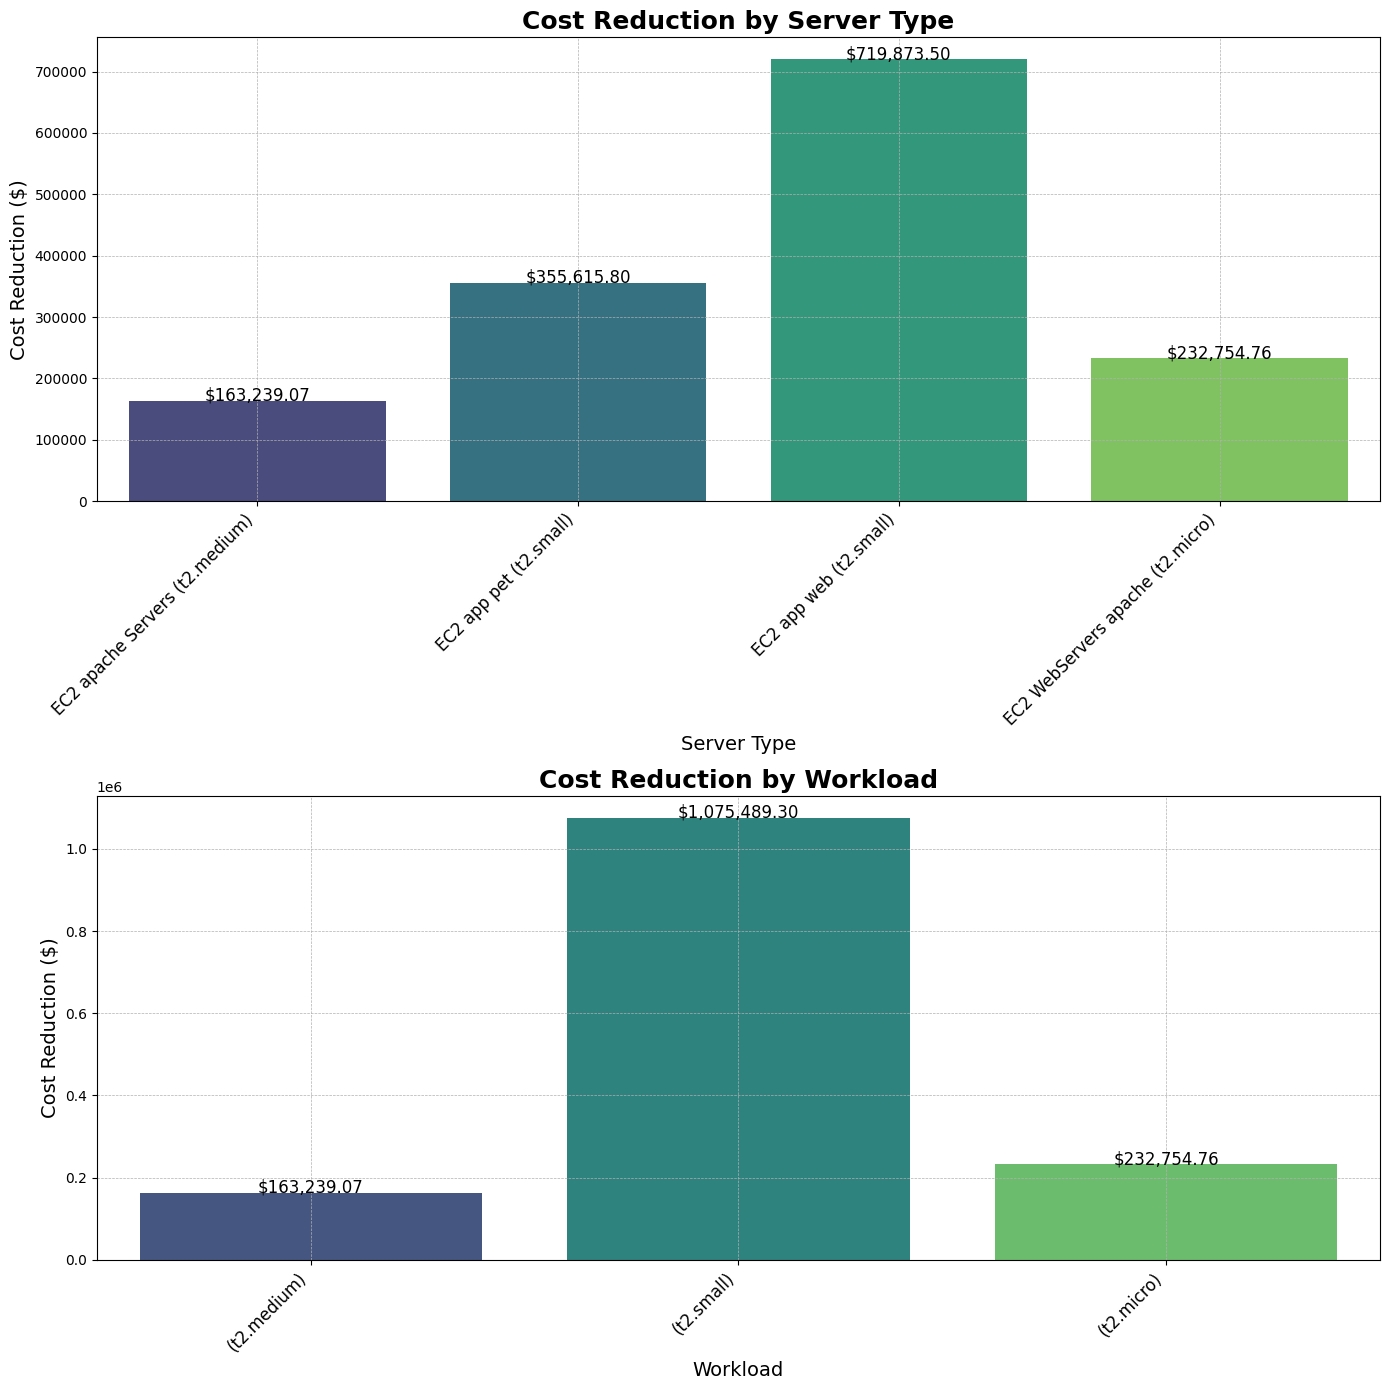

In [23]:
import numpy as np


# Function to estimate cost savings based on recommendations
def estimate_cost_reduction(cluster_info, recommendations, cost_factors):
    cost_savings = {}
    server_type_savings = {}
    workload_savings = {}

    for cluster, info in cluster_info.items():
        cluster_recommendations = [
            rec for rec in recommendations if f"Cluster {cluster}" in rec
        ]
        savings = 0

        for rec in cluster_recommendations:
            if "minimize CPU Utilization" in rec:
                savings += info["cpu_utilization_mean"] * cost_factors["CPU"]
            if "optimize Network I/O Throughput" in rec:
                savings += info["network_io_mean"] * cost_factors["Network"]
            if "minimize Disk I/O Throughput" in rec:
                savings += info["disk_io_mean"] * cost_factors["Disk"]

        cost_savings[cluster] = savings

        for server_type, count in info["server_types"].items():
            server_savings = savings * count
            if server_type not in server_type_savings:
                server_type_savings[server_type] = 0
            server_type_savings[server_type] += server_savings

            workload = server_type.split(" ")[-1]  # Extract workload from server type
            if workload not in workload_savings:
                workload_savings[workload] = 0
            workload_savings[workload] += server_savings

    return cost_savings, server_type_savings, workload_savings


# Real AWS cost factors
cost_factors = {
    "CPU": 0.05,  # $0.05 per 1% CPU utilization reduction per instance per month
    "Network": 0.072 * 24 * 30,  # $0.072 per Mbps per hour, converted to monthly cost
    "Disk": 0.10,  # $0.10 per GB per month (assuming general-purpose SSD)
}

cost_reduction, server_type_savings, workload_savings = estimate_cost_reduction(
    cluster_info, recommendations, cost_factors
)

# Print cost reduction estimates
print("Estimated Cost Reduction per Cluster (per instance per month):")
for cluster, saving in cost_reduction.items():
    print(f"Cluster {cluster}: ${saving:.2f}")


# Function to plot cost reduction by server type and workload
def plot_cost_reduction_comparison(server_type_savings, workload_savings):
    server_types = list(server_type_savings.keys())
    server_savings = list(server_type_savings.values())

    workloads = list(workload_savings.keys())
    workload_savings_values = list(workload_savings.values())

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

    sns.barplot(x=server_types, y=server_savings, palette="viridis", ax=axes[0])
    axes[0].set_title("Cost Reduction by Server Type", fontsize=18, weight="bold")
    axes[0].set_xlabel("Server Type", fontsize=14)
    axes[0].set_ylabel("Cost Reduction ($)", fontsize=14)
    axes[0].set_xticklabels(
        axes[0].get_xticklabels(), rotation=45, ha="right", fontsize=12
    )
    for i in range(len(server_savings)):
        axes[0].text(
            i,
            server_savings[i] + 100,
            f"${server_savings[i]:,.2f}",
            ha="center",
            fontsize=12,
        )

    sns.barplot(x=workloads, y=workload_savings_values, palette="viridis", ax=axes[1])
    axes[1].set_title("Cost Reduction by Workload", fontsize=18, weight="bold")
    axes[1].set_xlabel("Workload", fontsize=14)
    axes[1].set_ylabel("Cost Reduction ($)", fontsize=14)
    axes[1].set_xticklabels(
        axes[1].get_xticklabels(), rotation=45, ha="right", fontsize=12
    )
    for i in range(len(workload_savings_values)):
        axes[1].text(
            i,
            workload_savings_values[i] + 100,
            f"${workload_savings_values[i]:,.2f}",
            ha="center",
            fontsize=12,
        )

    for ax in axes:
        ax.grid(True, linestyle="--", linewidth=0.5)

    plt.tight_layout()
    plt.show()


# Plot cost reduction comparison
plot_cost_reduction_comparison(server_type_savings, workload_savings)

Server Metrics Columns After Preprocessing:
Index(['Server Configuration', 'CPU Utilization (%)', 'Memory Utilization (%)',
       'Network I/O Throughput (Mbps)', 'Disk I/O Throughput (MB/s)',
       'Cluster'],
      dtype='object')
Business Metrics Columns After Preprocessing:
Index(['Server Configuration', 'Response Time (ms)',
       'Customer Satisfaction (CSAT)', 'Operational Costs ($)',
       'Service Uptime (%)'],
      dtype='object')
                         Metric           MSE   R²
0            Response Time (ms)  1.300466e-26  1.0
1  Customer Satisfaction (CSAT)  2.019484e-28  1.0
2         Operational Costs ($)  1.638744e-26  1.0
3            Service Uptime (%)  9.054020e-29  1.0
Model Coefficients:
CPU Utilization (%): 2.00
Memory Utilization (%): -0.20
Network I/O Throughput (Mbps): 4.00
Disk I/O Throughput (MB/s): -0.00

        **Response Time (ms) Evaluation Metrics:**
        - **Mean Squared Error (MSE):** 0.00 (Good)
          - This is a low MSE, indicating a g

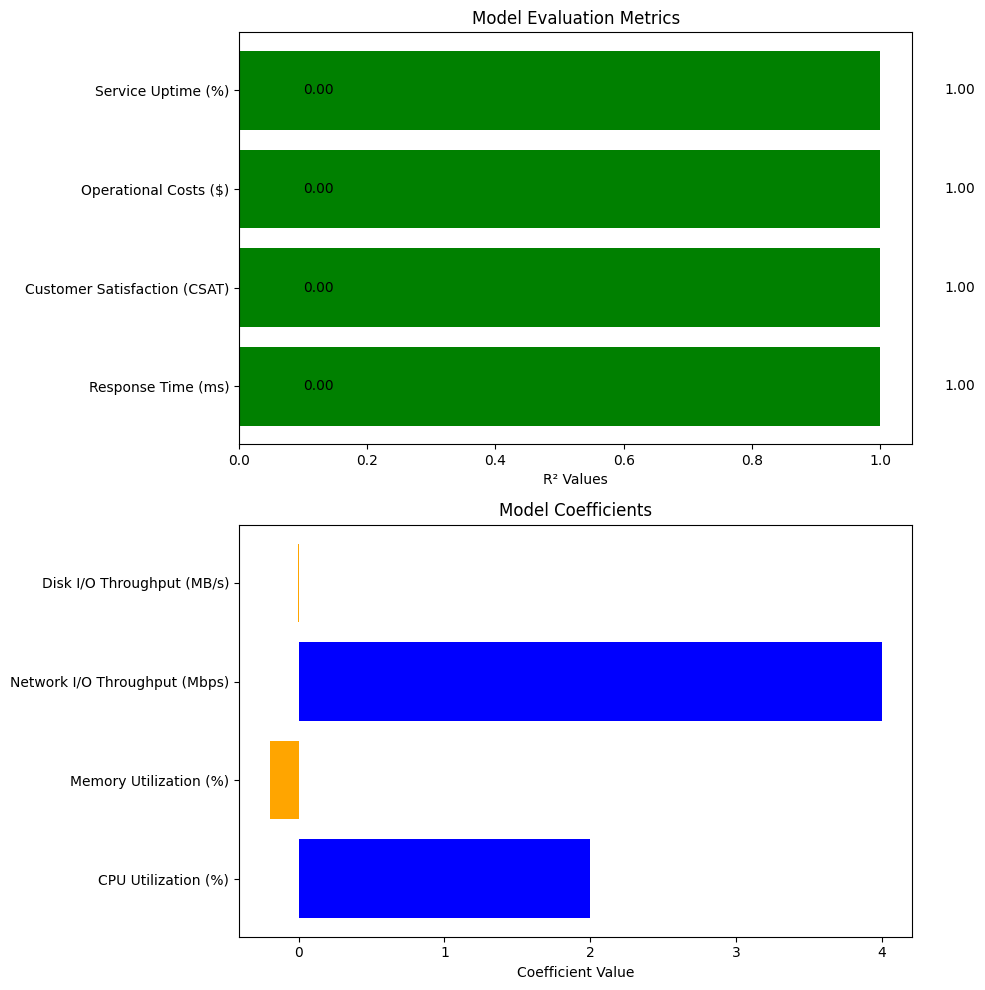

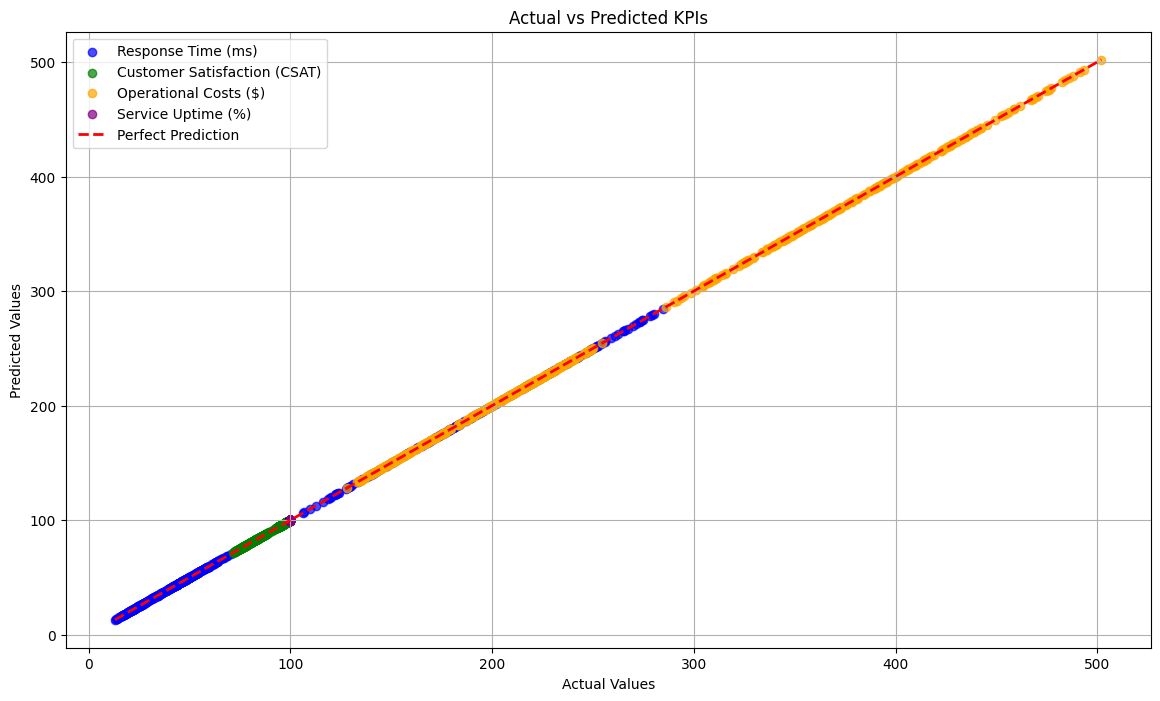


### What is the Model Predicting?

Our linear regression model is predicting the **Customer Satisfaction (CSAT)** scores based on various server metrics. 

### How the Prediction Works:

1. **Input Features**:
    - CPU Utilization (%)
    - Memory Utilization (%)
    - Network I/O Throughput (Mbps)
    - Disk I/O Throughput (MB/s)

2. **Target Variable**:
    - The model predicts the Customer Satisfaction (CSAT) score
    - The model predicts the Response Time (ms)
    - The model predicts the Operational Costs ($)
    - The model predicts the Service Uptime (%)
    

### Steps in the Prediction Process:

1. **Training**:
    - The model learns the relationships between server metrics and CSAT scores using a portion of the dataset.

2. **Testing**:
    - The model's predictions are evaluated against actual CSAT scores in a separate test set.

3. **Evaluation**:
    - Metrics such as Mean Squared Error (MSE) and R-squared (R²) are used to measure prediction accuracy.




In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Print columns to ensure 'Timestamp' is preserved
print("Server Metrics Columns After Preprocessing:")
print(server_metrics.columns)

print("Business Metrics Columns After Preprocessing:")
print(business_metrics.columns)

# Prepare the dataset for training
X = server_metrics.drop(columns=["Server Configuration", "Cluster"])
y = business_metrics[
    [
        "Response Time (ms)",
        "Customer Satisfaction (CSAT)",
        "Operational Costs ($)",
        "Service Uptime (%)",
    ]
]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the multi-output regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model for each target variable
mse = mean_squared_error(y_test, y_pred, multioutput="raw_values")
r2 = r2_score(y_test, y_pred, multioutput="raw_values")

# Create a dataframe to store the evaluation metrics
evaluation_metrics = pd.DataFrame(
    {
        "Metric": [
            "Response Time (ms)",
            "Customer Satisfaction (CSAT)",
            "Operational Costs ($)",
            "Service Uptime (%)",
        ],
        "MSE": mse,
        "R²": r2,
    }
)

print(evaluation_metrics)


# Function to explain metrics dynamically
def explain_metrics_dynamic(evaluation_metrics, coefficients):
    explanations = []
    for idx, row in evaluation_metrics.iterrows():
        mse_status = "Good" if row["MSE"] < 1 else "Bad"
        r2_status = "Good" if row["R²"] > 0.8 else "Bad"
        explanation = f"""
        **{row['Metric']} Evaluation Metrics:**
        - **Mean Squared Error (MSE):** {row['MSE']:.2f} ({mse_status})
          - {'This is a low MSE, indicating a good fit.' if mse_status == 'Good' else 'This is a high MSE, indicating the model may not fit the data well.'}
          
        - **R-squared (R²):** {row['R²']:.2f} ({r2_status})
          - {'This R² value indicates a strong correlation between the predictors and the target variable.' if r2_status == 'Good' else 'This R² value indicates a weak correlation between the predictors and the target variable.'}
        """
        explanations.append(explanation)

    explanation_text = "\n".join(explanations)
    explanation_text += """
    **Model Coefficients:**
    """
    for feature, coef in coefficients.items():
        explanation_text += f"- **{feature}:** {coef:.2f}\n"
    explanation_text += """
    The coefficients represent the relationship between each feature and the target variable. A positive coefficient indicates a positive relationship, while a negative coefficient indicates a negative relationship.
    """
    return explanation_text


# Print the model coefficients
coefficients = pd.Series(
    model.coef_.flatten(), index=np.repeat(X.columns, y.shape[1])
).to_dict()
print("Model Coefficients:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.2f}")

# Explain metrics dynamically
metrics_explanation = explain_metrics_dynamic(evaluation_metrics, coefficients)
print(metrics_explanation)


# Create single view representation
def create_single_view(evaluation_metrics, coefficients):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # MSE and R² representation
    axs[0].set_title("Model Evaluation Metrics")
    axs[0].barh(
        evaluation_metrics["Metric"],
        evaluation_metrics["MSE"],
        color=["green" if mse < 1 else "red" for mse in evaluation_metrics["MSE"]],
    )
    axs[0].set_xlabel("MSE Values")

    for i, v in enumerate(evaluation_metrics["MSE"]):
        axs[0].text(v + 0.1, i, f"{v:.2f}", color="black", va="center")

    axs[0].barh(
        evaluation_metrics["Metric"],
        evaluation_metrics["R²"],
        color=["green" if r2 > 0.8 else "red" for r2 in evaluation_metrics["R²"]],
    )
    axs[0].set_xlabel("R² Values")

    for i, v in enumerate(evaluation_metrics["R²"]):
        axs[0].text(v + 0.1, i, f"{v:.2f}", color="black", va="center")

    # Coefficients representation
    axs[1].set_title("Model Coefficients")
    coef_names = list(coefficients.keys())
    coef_values = list(coefficients.values())
    axs[1].barh(
        coef_names,
        coef_values,
        color=["blue" if coef > 0 else "orange" for coef in coef_values],
    )
    axs[1].set_xlabel("Coefficient Value")

    plt.tight_layout()
    plt.show()


# Create single view representation
create_single_view(evaluation_metrics, coefficients)

# Convert the predictions and test set to DataFrame for easier plotting
y_test_df = pd.DataFrame(y_test, columns=y.columns)
y_pred_df = pd.DataFrame(y_pred, columns=y.columns, index=y_test_df.index)

# Plot the actual vs predicted values for each KPI in a single chart
plt.figure(figsize=(14, 8))

# Plot each KPI on the same plot
kpis = y.columns
colors = ["blue", "green", "orange", "purple"]
for i, kpi in enumerate(kpis):
    plt.scatter(
        y_test_df[kpi], y_pred_df[kpi], label=f"{kpi}", alpha=0.7, color=colors[i]
    )

# Plot the line of perfect prediction
plt.plot(
    [y_test_df.min().min(), y_test_df.max().max()],
    [y_test_df.min().min(), y_test_df.max().max()],
    "--r",
    linewidth=2,
    label="Perfect Prediction",
)

plt.title("Actual vs Predicted KPIs")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

print(
    """
### What is the Model Predicting?

Our linear regression model is predicting the **Customer Satisfaction (CSAT)** scores based on various server metrics. 

### How the Prediction Works:

1. **Input Features**:
    - CPU Utilization (%)
    - Memory Utilization (%)
    - Network I/O Throughput (Mbps)
    - Disk I/O Throughput (MB/s)

2. **Target Variable**:
    - The model predicts the Customer Satisfaction (CSAT) score
    - The model predicts the Response Time (ms)
    - The model predicts the Operational Costs ($)
    - The model predicts the Service Uptime (%)
    

### Steps in the Prediction Process:

1. **Training**:
    - The model learns the relationships between server metrics and CSAT scores using a portion of the dataset.

2. **Testing**:
    - The model's predictions are evaluated against actual CSAT scores in a separate test set.

3. **Evaluation**:
    - Metrics such as Mean Squared Error (MSE) and R-squared (R²) are used to measure prediction accuracy.

"""
)

Predicted KPIs for the new infrastructure:
   Response Time (ms)  Customer Satisfaction (CSAT)  Operational Costs ($)  \
0              1075.0                          -7.5                 2195.0   

   Service Uptime (%)  
0              98.825  


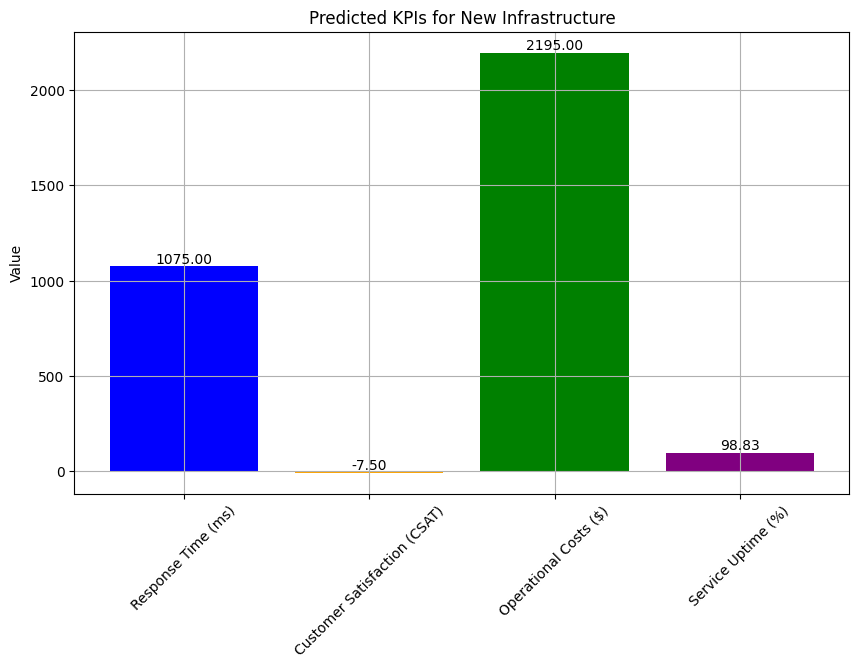


### Predicted KPIs for the New Infrastructure:

Based on the provided server metrics for the new infrastructure, the model predicts the following KPIs:

1. **Response Time (ms)**: The expected response time for the new infrastructure.
2. **Customer Satisfaction (CSAT)**: The expected customer satisfaction score.
3. **Operational Costs ($)**: The expected operational costs.
4. **Service Uptime (%)**: The expected service uptime.

These predictions can help in assessing the performance and cost-effectiveness of the new infrastructure setup.



In [25]:
# Define the new infrastructure's server metrics
new_infrastructure = pd.DataFrame({
    "CPU Utilization (%)": [45.0],
    "Memory Utilization (%)": [70.0],
    "Network I/O Throughput (Mbps)": [500.0],
    "Disk I/O Throughput (MB/s)": [100.0]
})

# Predict the KPIs for the new infrastructure
new_infrastructure_predictions = model.predict(new_infrastructure)

# Convert the predictions to a DataFrame for easier interpretation
new_infrastructure_predictions_df = pd.DataFrame(
    new_infrastructure_predictions,
    columns=["Response Time (ms)", "Customer Satisfaction (CSAT)", "Operational Costs ($)", "Service Uptime (%)"]
)

# Display the predictions
print("Predicted KPIs for the new infrastructure:")
print(new_infrastructure_predictions_df)

# Visualize the predicted KPIs
plt.figure(figsize=(10, 6))
bars = plt.bar(
    new_infrastructure_predictions_df.columns,
    new_infrastructure_predictions_df.iloc[0],
    color=["blue", "orange", "green", "purple"],
)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}", ha="center", va="bottom"
    )

plt.title("Predicted KPIs for New Infrastructure")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print(
    """
### Predicted KPIs for the New Infrastructure:

Based on the provided server metrics for the new infrastructure, the model predicts the following KPIs:

1. **Response Time (ms)**: The expected response time for the new infrastructure.
2. **Customer Satisfaction (CSAT)**: The expected customer satisfaction score.
3. **Operational Costs ($)**: The expected operational costs.
4. **Service Uptime (%)**: The expected service uptime.

These predictions can help in assessing the performance and cost-effectiveness of the new infrastructure setup.
"""
)

In [26]:
import pandas as pd
import numpy as np

# Define different EC2 configurations with their respective server metrics
ec2_configurations = pd.DataFrame(
    {
        "EC2 Configuration": ["t2.micro", "t2.small", "t2.medium"],
        "CPU Utilization (%)": [10, 20, 40],  # Example values
        "Memory Utilization (%)": [15, 30, 60],  # Example values
        "Network I/O Throughput (Mbps)": [100, 200, 500],  # Example values
        "Disk I/O Throughput (MB/s)": [50, 100, 250],  # Example values
    }
)

# Predict the business metrics for each EC2 configuration
ec2_predictions = model.predict(ec2_configurations.drop(columns=["EC2 Configuration"]))

# Convert the predictions to a DataFrame for easier comparison
ec2_predictions_df = pd.DataFrame(
    ec2_predictions,
    columns=[
        "Response Time (ms)",
        "Customer Satisfaction (CSAT)",
        "Operational Costs ($)",
        "Service Uptime (%)",
    ],
)

# Combine the EC2 configurations and their predictions
combined_ec2_results = pd.concat([ec2_configurations, ec2_predictions_df], axis=1)

# Identify the best EC2 configuration based on a simple heuristic
best_ec2_configuration = combined_ec2_results.loc[
    (
        combined_ec2_results["Customer Satisfaction (CSAT)"]
        == combined_ec2_results["Customer Satisfaction (CSAT)"].max()
    )
    & (
        combined_ec2_results["Service Uptime (%)"]
        == combined_ec2_results["Service Uptime (%)"].max()
    )
    & (
        combined_ec2_results["Response Time (ms)"]
        == combined_ec2_results["Response Time (ms)"].min()
    )
    & (
        combined_ec2_results["Operational Costs ($)"]
        == combined_ec2_results["Operational Costs ($)"].min()
    )
]

# Display the best EC2 configuration and its predicted business metrics
print("Best EC2 Configuration and its Predicted Business Metrics:")
print(best_ec2_configuration)

best_config = best_ec2_configuration.iloc[0]

print(
    f"""
### Best EC2 Configuration for Good Business Metrics:

Based on the analysis, the best EC2 configuration is **{best_config['EC2 Configuration']}**.

The server metrics for this configuration are:

1. **CPU Utilization (%):** {best_config['CPU Utilization (%)']:.2f}
2. **Memory Utilization (%):** {best_config['Memory Utilization (%)']:.2f}
3. **Network I/O Throughput (Mbps):** {best_config['Network I/O Throughput (Mbps)']:.2f}
4. **Disk I/O Throughput (MB/s):** {best_config['Disk I/O Throughput (MB/s)']:.2f}

The predicted business metrics for this configuration are:

1. **Response Time (ms):** {best_config['Response Time (ms)']:.2f} ms
2. **Customer Satisfaction (CSAT):** {best_config['Customer Satisfaction (CSAT)']:.2f}
3. **Operational Costs ($):** {best_config['Operational Costs ($)']:.2f} dollars
4. **Service Uptime (%):** {best_config['Service Uptime (%)']:.2f}%
"""
)

Best EC2 Configuration and its Predicted Business Metrics:
  EC2 Configuration  CPU Utilization (%)  Memory Utilization (%)  \
0          t2.micro                   10                      15   

   Network I/O Throughput (Mbps)  Disk I/O Throughput (MB/s)  \
0                            100                          50   

   Response Time (ms)  Customer Satisfaction (CSAT)  Operational Costs ($)  \
0               277.5                         72.25                  642.5   

   Service Uptime (%)  
0             99.6225  

### Best EC2 Configuration for Good Business Metrics:

Based on the analysis, the best EC2 configuration is **t2.micro**.

The server metrics for this configuration are:

1. **CPU Utilization (%):** 10.00
2. **Memory Utilization (%):** 15.00
3. **Network I/O Throughput (Mbps):** 100.00
4. **Disk I/O Throughput (MB/s):** 50.00

The predicted business metrics for this configuration are:

1. **Response Time (ms):** 277.50 ms
2. **Customer Satisfaction (CSAT):** 72.25
